In [184]:
import matplotlib.pyplot as plt 
from datetime import datetime
from scipy import stats
import seaborn as sns 
import pandas as pd
import numpy as np

In [185]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name=1)

# 1-Info About Dataset

In [186]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [188]:
df.describe() #There are two numerical columns.

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [189]:
df.isna().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [190]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


In [191]:
object_value = df.select_dtypes("object")

Ptid value counts:
Ptid
P1       1
P2275    1
P2277    1
P2278    1
P2279    1
        ..
P1145    1
P1146    1
P1147    1
P1148    1
P3424    1
Name: count, Length: 3424, dtype: int64



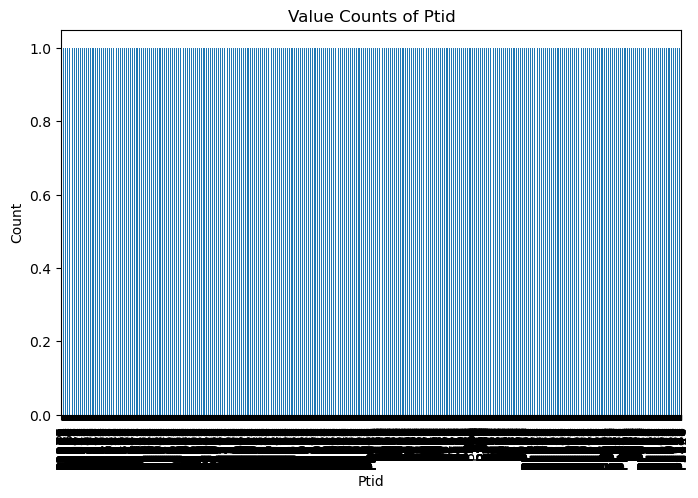

Persistency_Flag value counts:
Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64



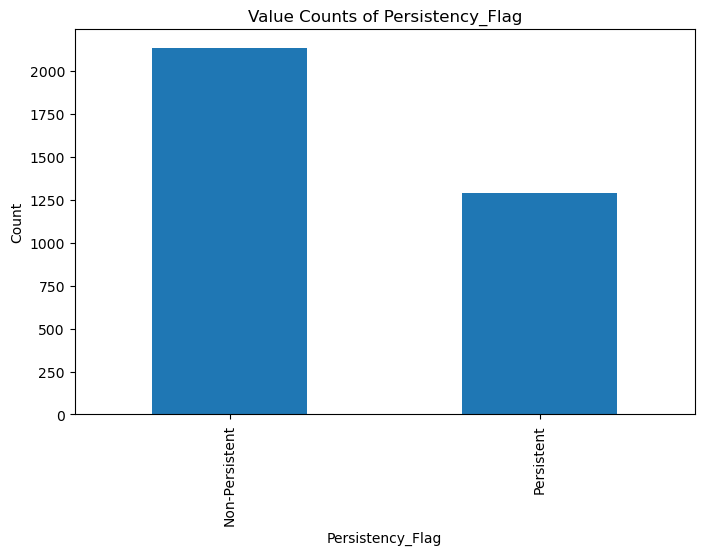

Gender value counts:
Gender
Female    3230
Male       194
Name: count, dtype: int64



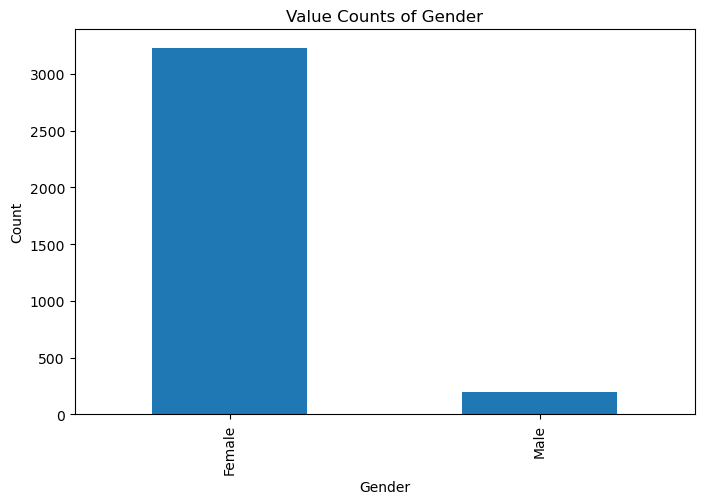

Race value counts:
Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64



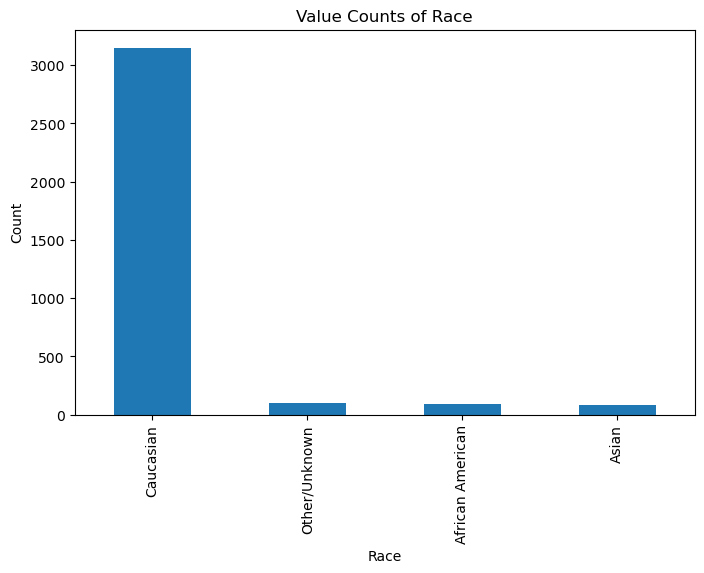

Ethnicity value counts:
Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64



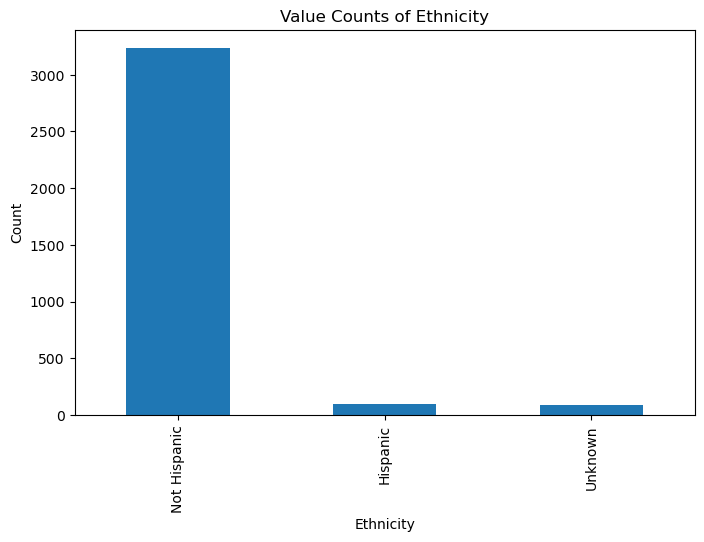

Region value counts:
Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64



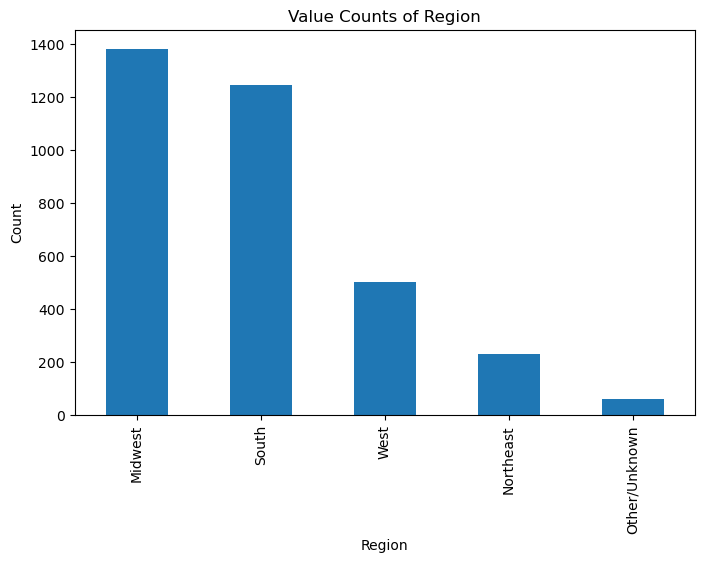

Age_Bucket value counts:
Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64



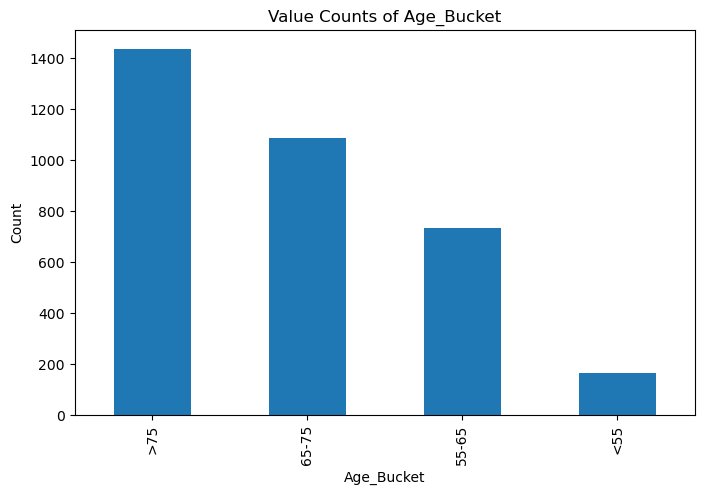

Ntm_Speciality value counts:
Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITAT

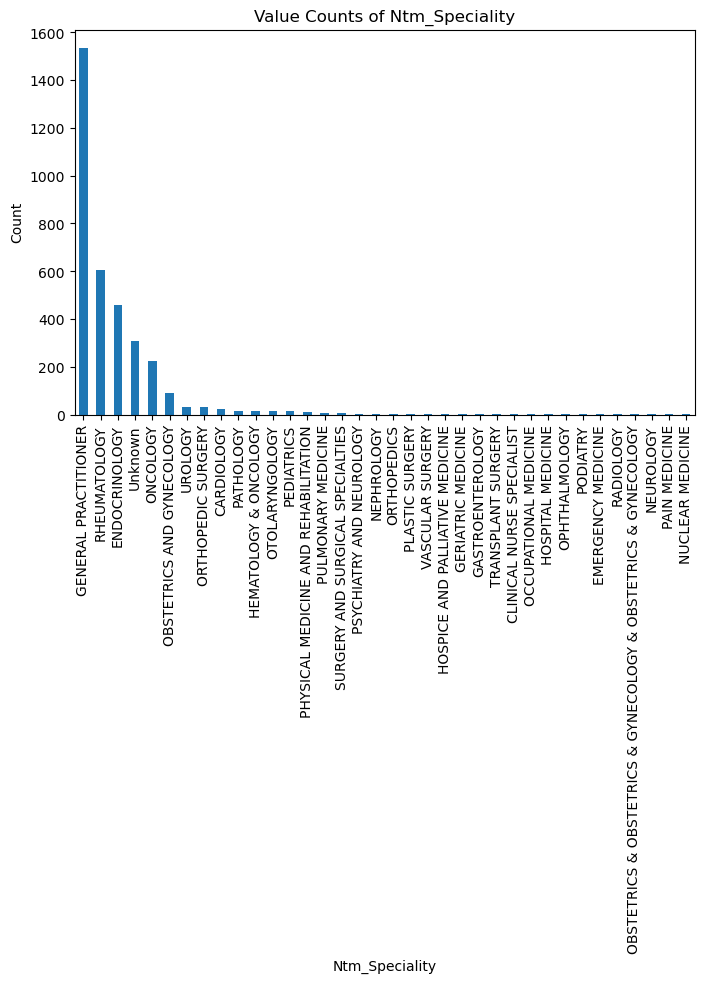

Ntm_Specialist_Flag value counts:
Ntm_Specialist_Flag
Others        2013
Specialist    1411
Name: count, dtype: int64



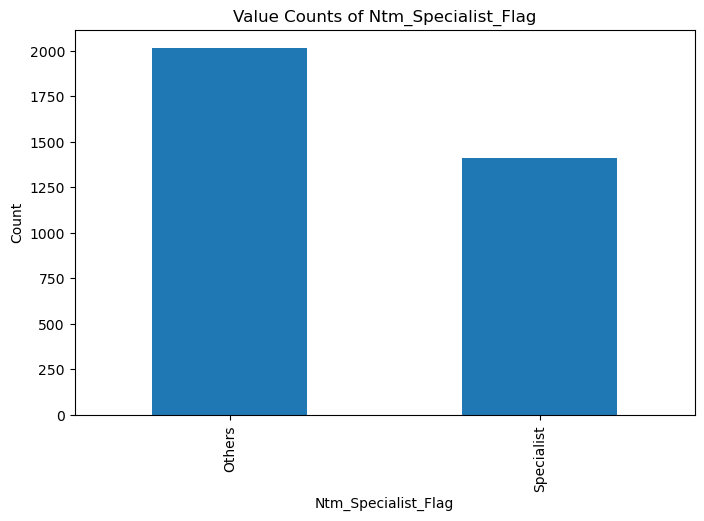

Ntm_Speciality_Bucket value counts:
Ntm_Speciality_Bucket
OB/GYN/Others/PCP/Unknown    2104
Endo/Onc/Uro                  716
Rheum                         604
Name: count, dtype: int64



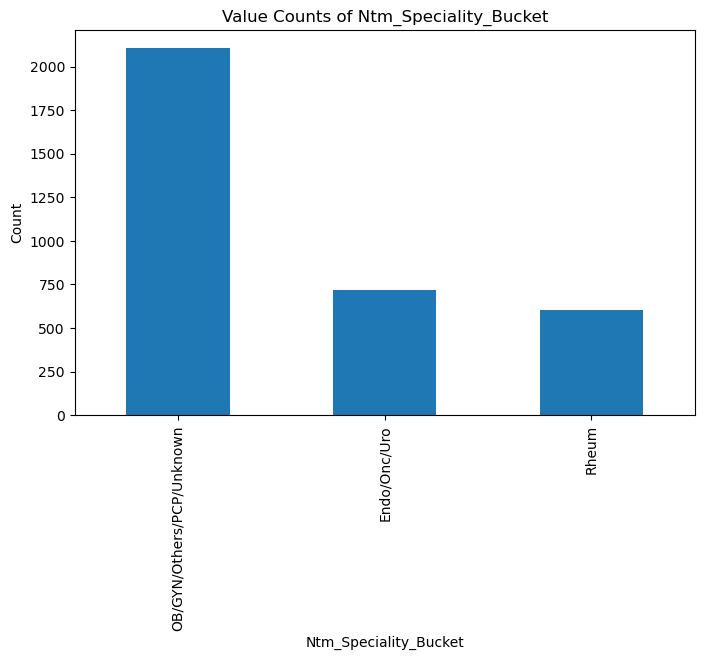

Gluco_Record_Prior_Ntm value counts:
Gluco_Record_Prior_Ntm
N    2619
Y     805
Name: count, dtype: int64



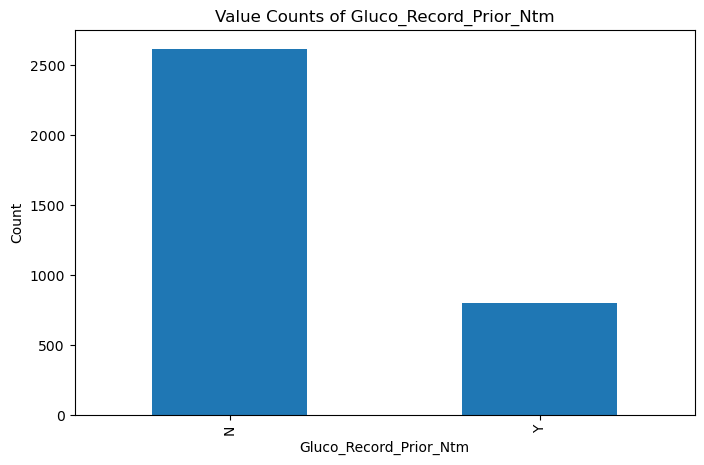

Gluco_Record_During_Rx value counts:
Gluco_Record_During_Rx
N    2522
Y     902
Name: count, dtype: int64



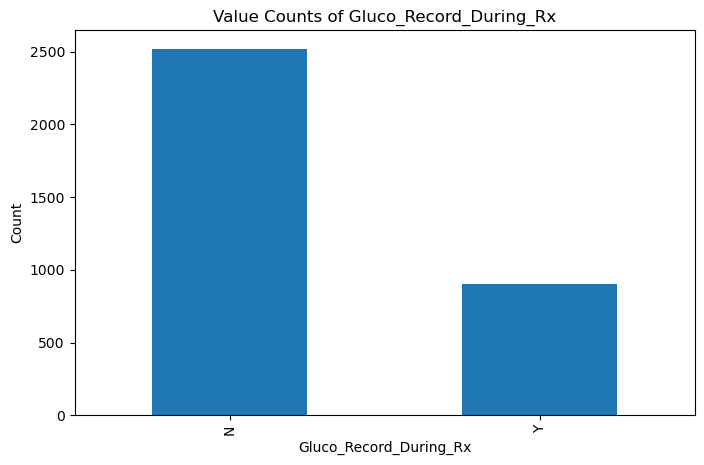

Dexa_During_Rx value counts:
Dexa_During_Rx
N    2488
Y     936
Name: count, dtype: int64



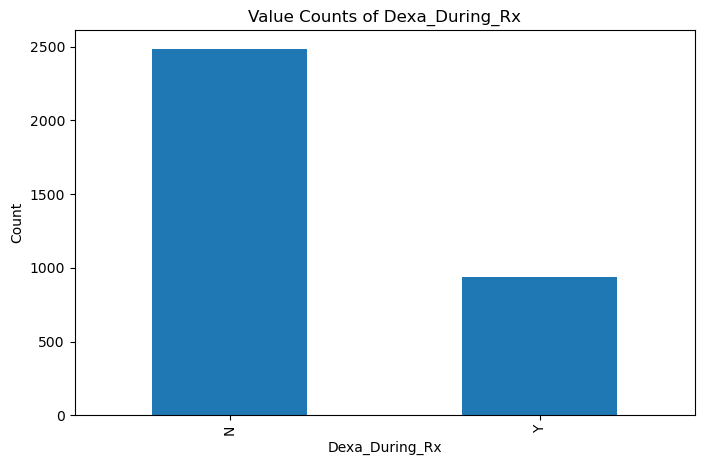

Frag_Frac_Prior_Ntm value counts:
Frag_Frac_Prior_Ntm
N    2872
Y     552
Name: count, dtype: int64



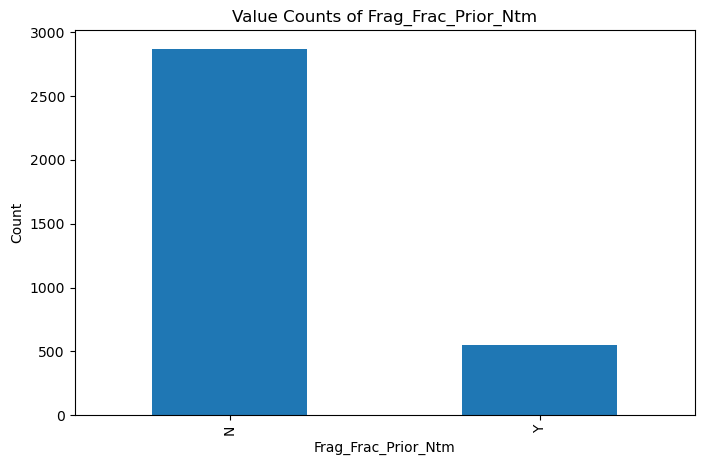

Frag_Frac_During_Rx value counts:
Frag_Frac_During_Rx
N    3007
Y     417
Name: count, dtype: int64



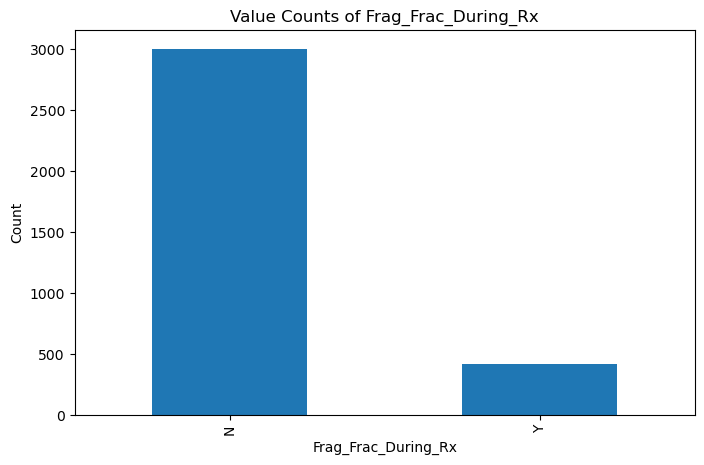

Risk_Segment_Prior_Ntm value counts:
Risk_Segment_Prior_Ntm
VLR_LR    1931
HR_VHR    1493
Name: count, dtype: int64



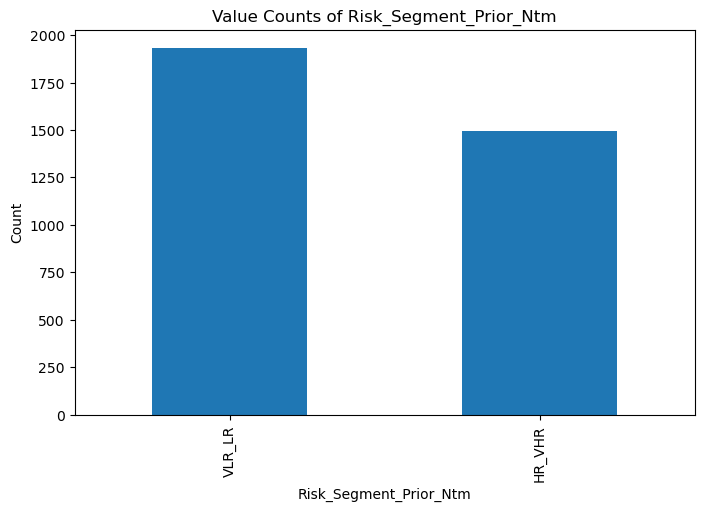

Tscore_Bucket_Prior_Ntm value counts:
Tscore_Bucket_Prior_Ntm
>-2.5     1951
<=-2.5    1473
Name: count, dtype: int64



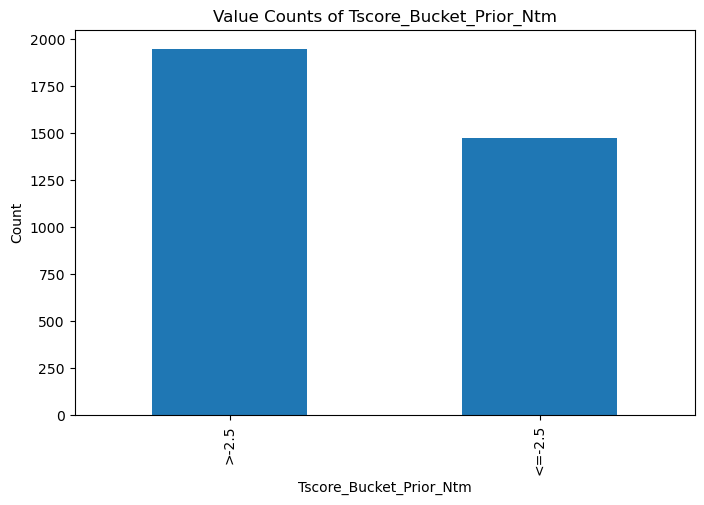

Risk_Segment_During_Rx value counts:
Risk_Segment_During_Rx
Unknown    1497
HR_VHR      965
VLR_LR      962
Name: count, dtype: int64



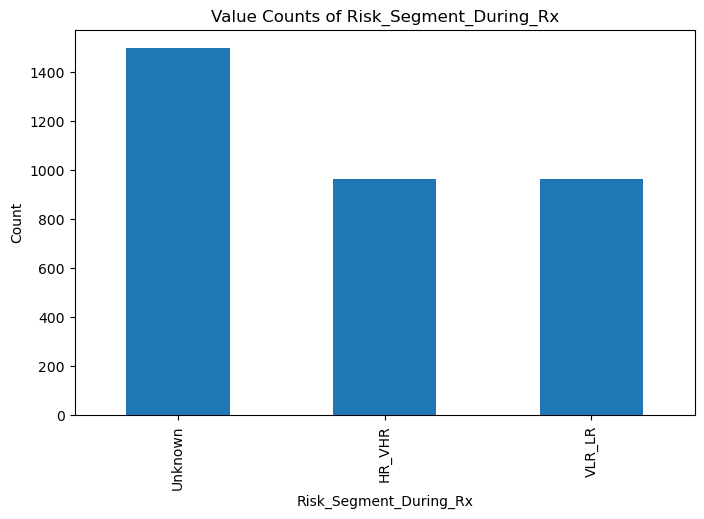

Tscore_Bucket_During_Rx value counts:
Tscore_Bucket_During_Rx
Unknown    1497
<=-2.5     1017
>-2.5       910
Name: count, dtype: int64



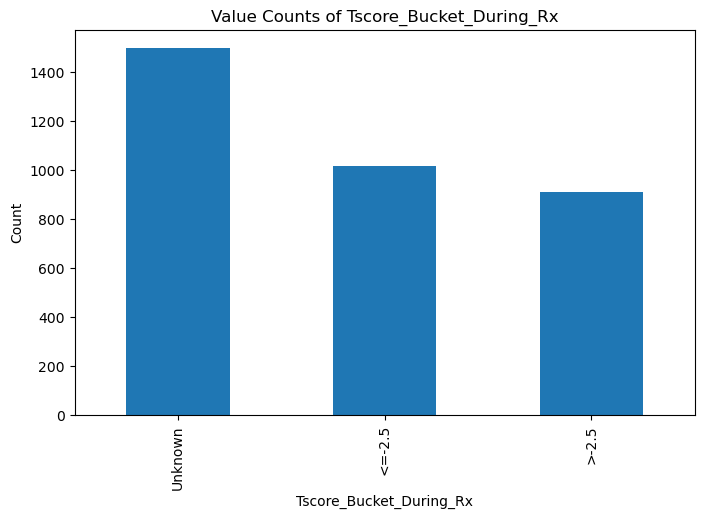

Change_T_Score value counts:
Change_T_Score
No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: count, dtype: int64



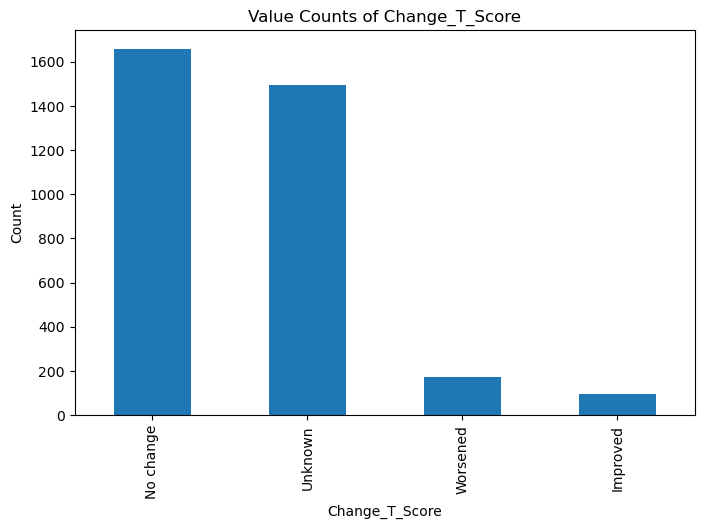

Change_Risk_Segment value counts:
Change_Risk_Segment
Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: count, dtype: int64



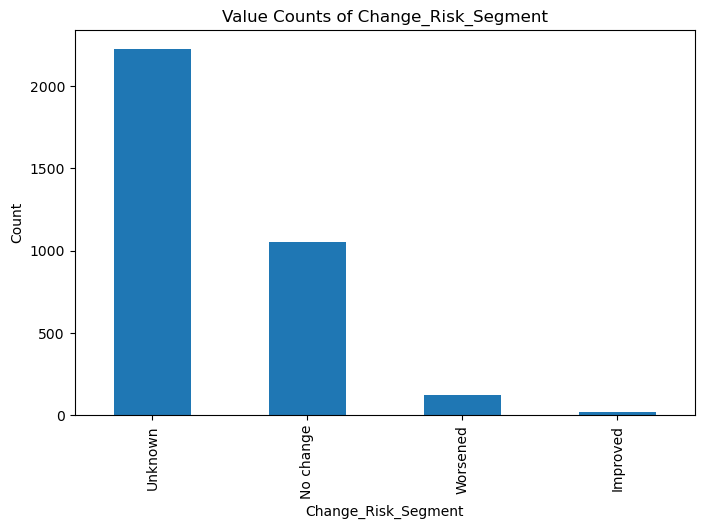

Adherent_Flag value counts:
Adherent_Flag
Adherent        3251
Non-Adherent     173
Name: count, dtype: int64



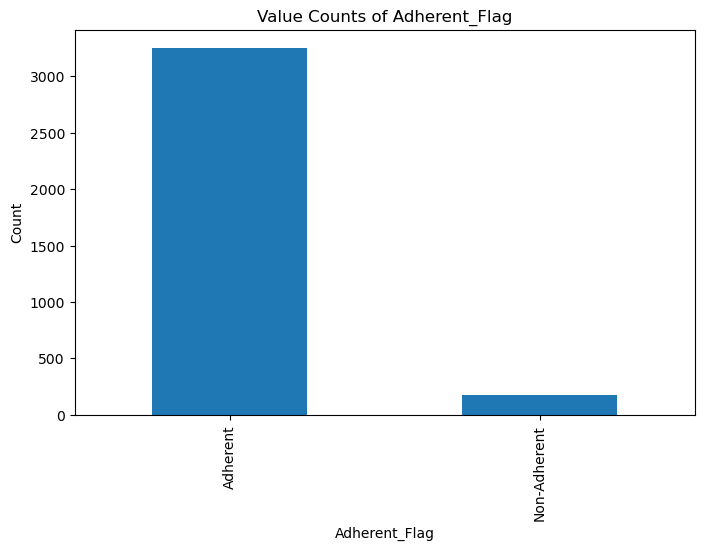

Idn_Indicator value counts:
Idn_Indicator
Y    2557
N     867
Name: count, dtype: int64



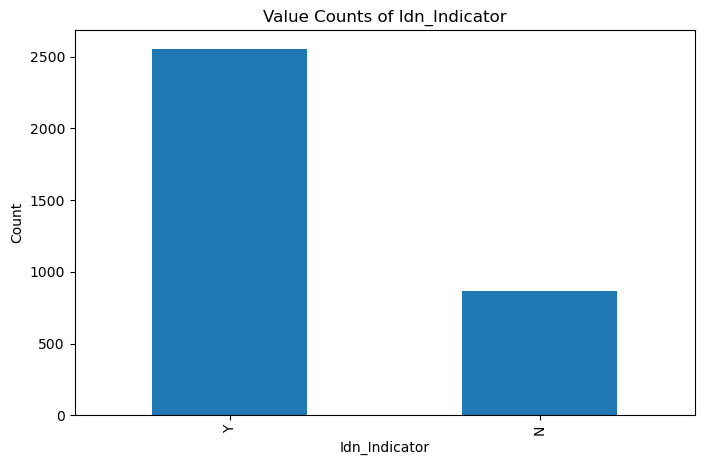

Injectable_Experience_During_Rx value counts:
Injectable_Experience_During_Rx
Y    3056
N     368
Name: count, dtype: int64



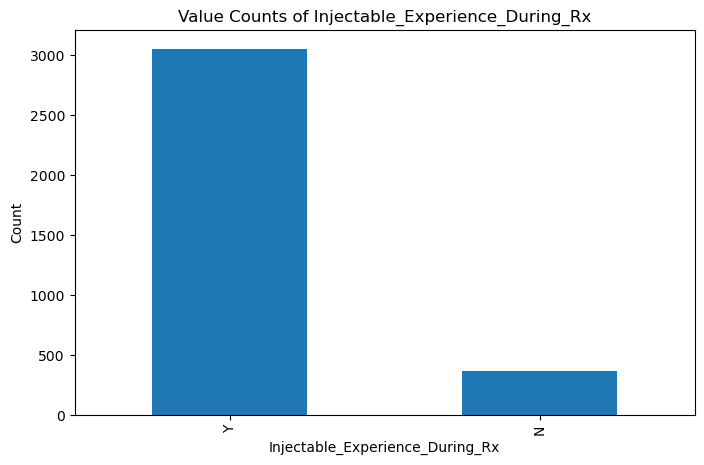

Comorb_Encounter_For_Screening_For_Malignant_Neoplasms value counts:
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
N    1891
Y    1533
Name: count, dtype: int64



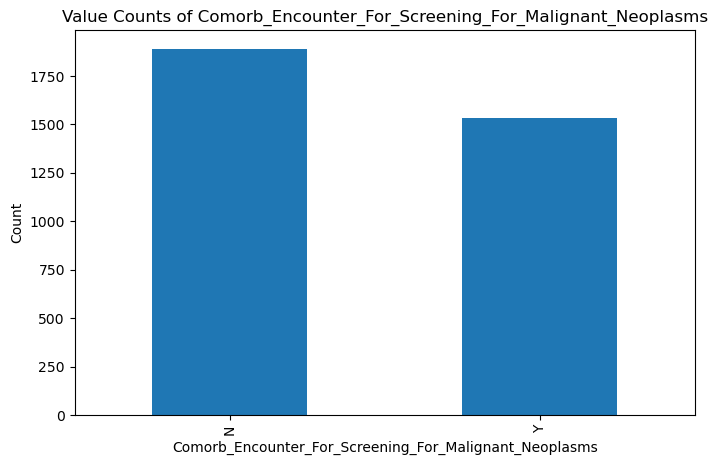

Comorb_Encounter_For_Immunization value counts:
Comorb_Encounter_For_Immunization
N    1911
Y    1513
Name: count, dtype: int64



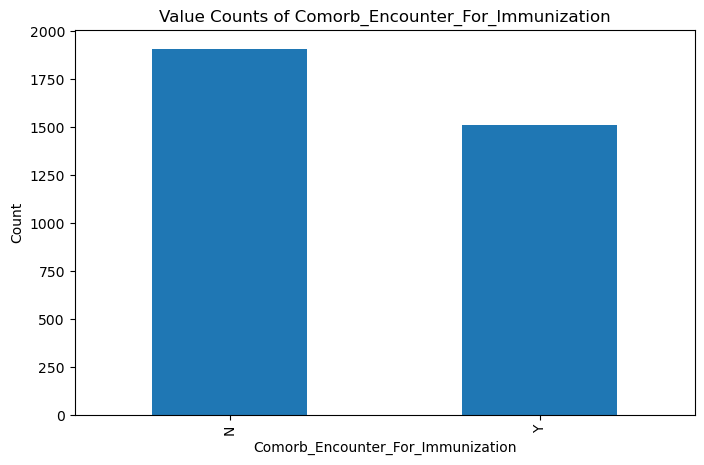

Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx value counts:
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
N    2072
Y    1352
Name: count, dtype: int64



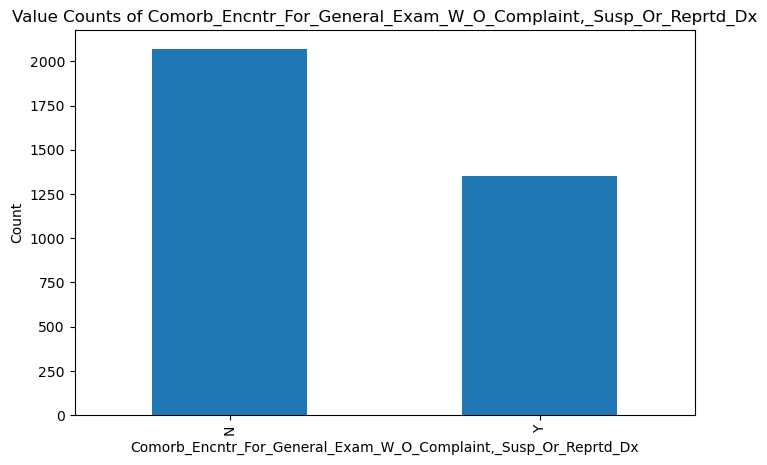

Comorb_Vitamin_D_Deficiency value counts:
Comorb_Vitamin_D_Deficiency
N    2331
Y    1093
Name: count, dtype: int64



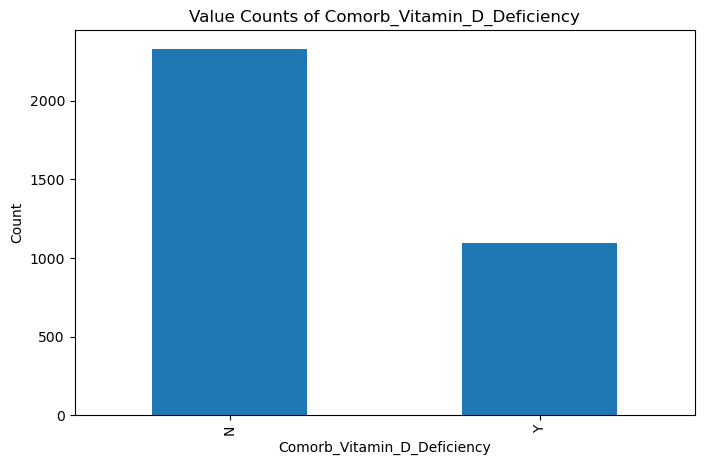

Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified value counts:
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
N    2425
Y     999
Name: count, dtype: int64



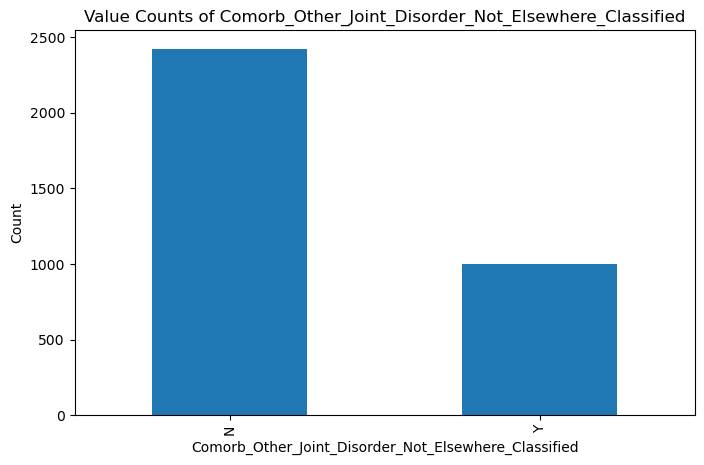

Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx value counts:
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
N    2633
Y     791
Name: count, dtype: int64



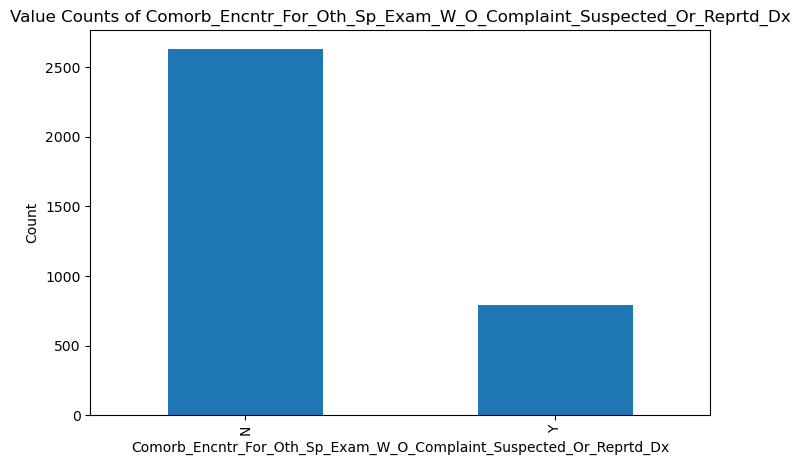

Comorb_Long_Term_Current_Drug_Therapy value counts:
Comorb_Long_Term_Current_Drug_Therapy
N    2607
Y     817
Name: count, dtype: int64



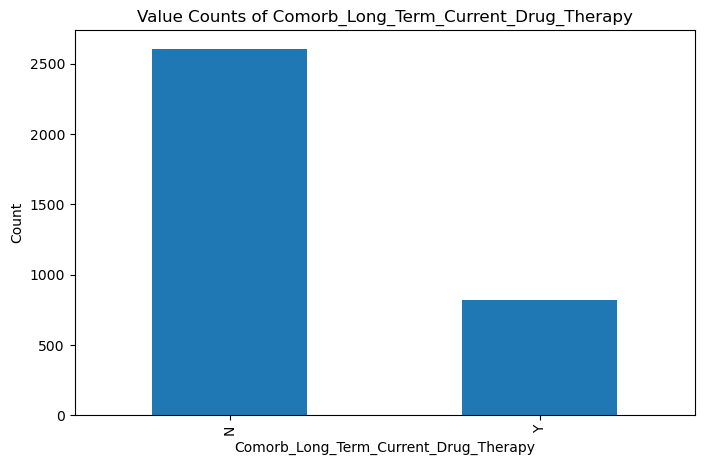

Comorb_Dorsalgia value counts:
Comorb_Dorsalgia
N    2645
Y     779
Name: count, dtype: int64



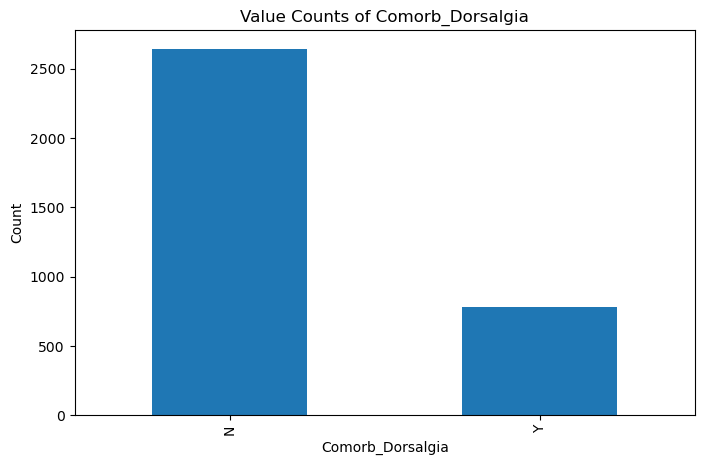

Comorb_Personal_History_Of_Other_Diseases_And_Conditions value counts:
Comorb_Personal_History_Of_Other_Diseases_And_Conditions
N    2747
Y     677
Name: count, dtype: int64



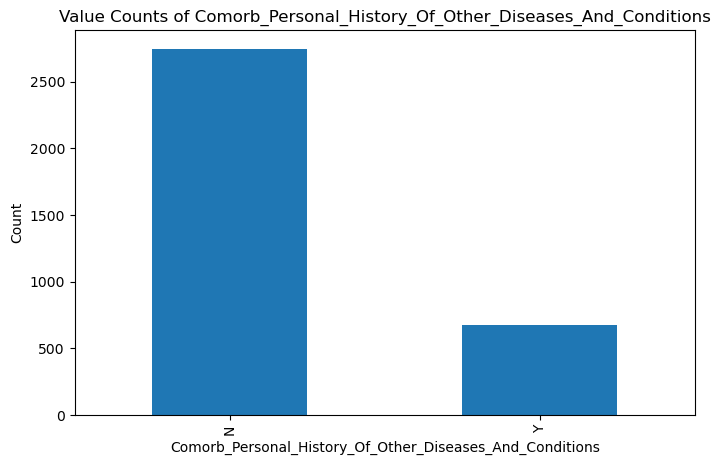

Comorb_Other_Disorders_Of_Bone_Density_And_Structure value counts:
Comorb_Other_Disorders_Of_Bone_Density_And_Structure
N    2906
Y     518
Name: count, dtype: int64



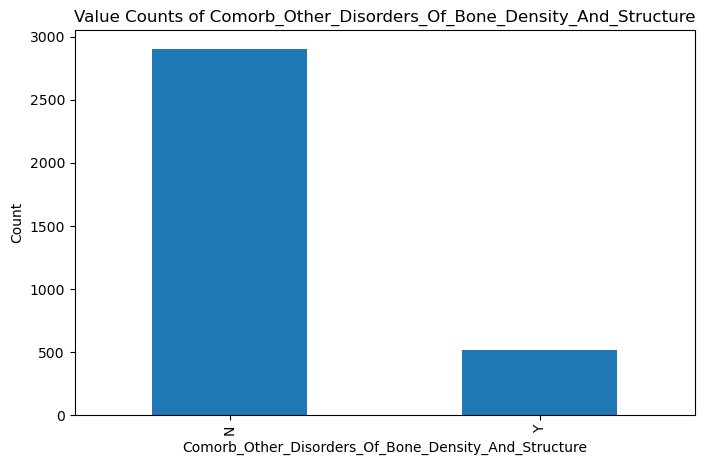

Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias value counts:
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
Y    1765
N    1659
Name: count, dtype: int64



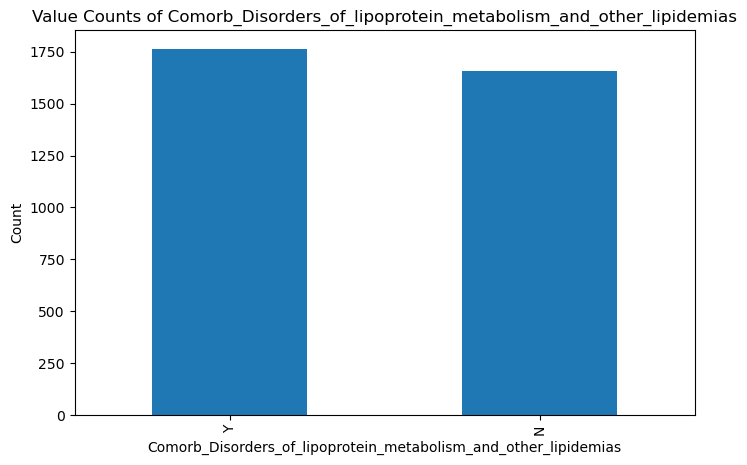

Comorb_Osteoporosis_without_current_pathological_fracture value counts:
Comorb_Osteoporosis_without_current_pathological_fracture
N    2507
Y     917
Name: count, dtype: int64



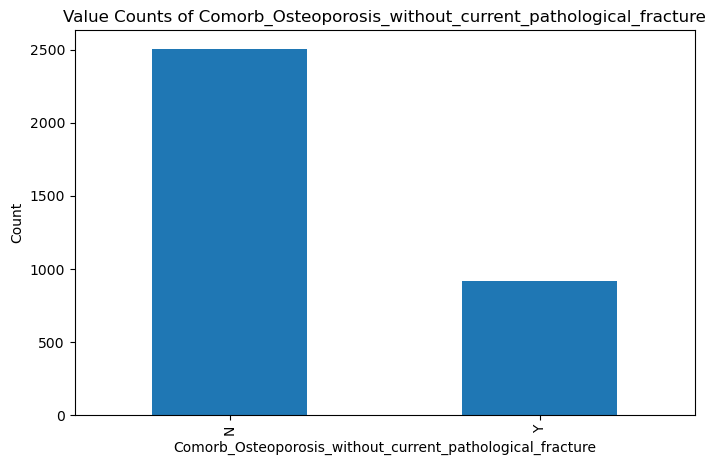

Comorb_Personal_history_of_malignant_neoplasm value counts:
Comorb_Personal_history_of_malignant_neoplasm
N    2775
Y     649
Name: count, dtype: int64



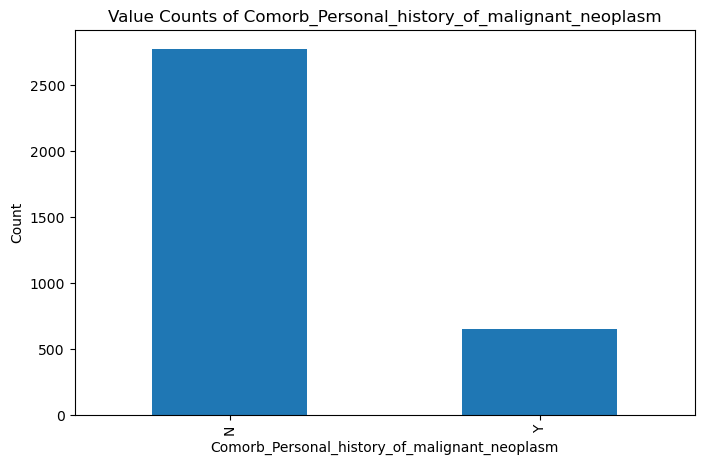

Comorb_Gastro_esophageal_reflux_disease value counts:
Comorb_Gastro_esophageal_reflux_disease
N    2794
Y     630
Name: count, dtype: int64



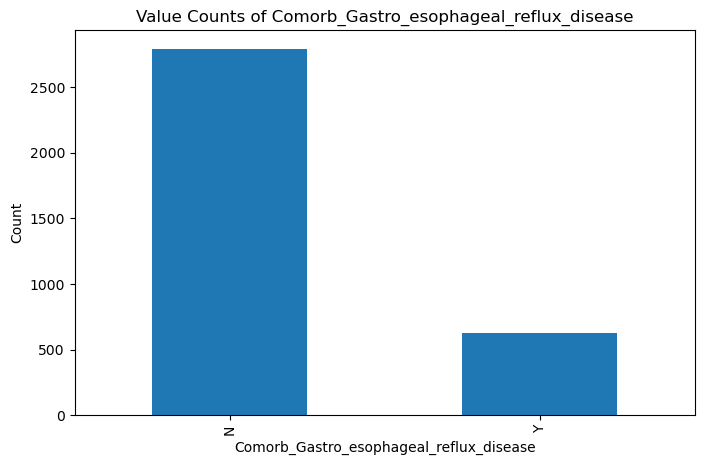

Concom_Cholesterol_And_Triglyceride_Regulating_Preparations value counts:
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
N    2242
Y    1182
Name: count, dtype: int64



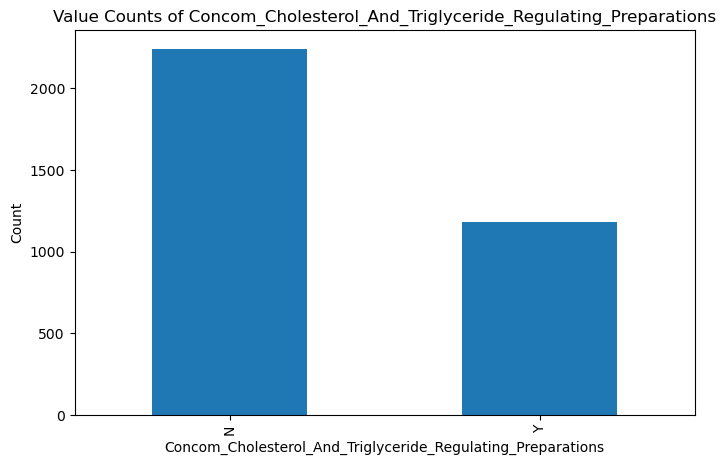

Concom_Narcotics value counts:
Concom_Narcotics
N    2191
Y    1233
Name: count, dtype: int64



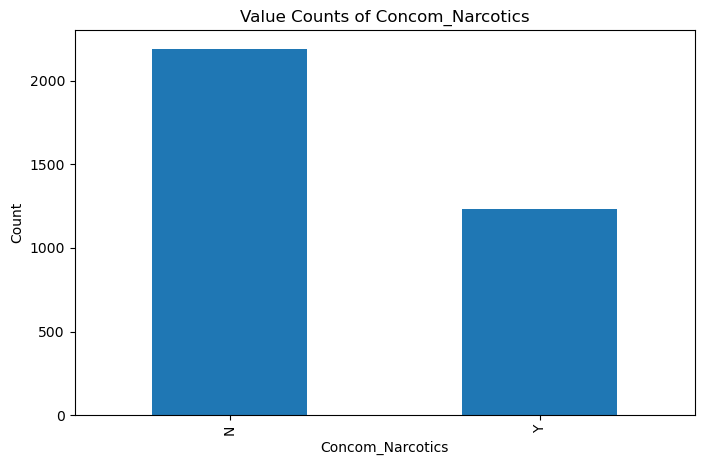

Concom_Systemic_Corticosteroids_Plain value counts:
Concom_Systemic_Corticosteroids_Plain
N    2451
Y     973
Name: count, dtype: int64



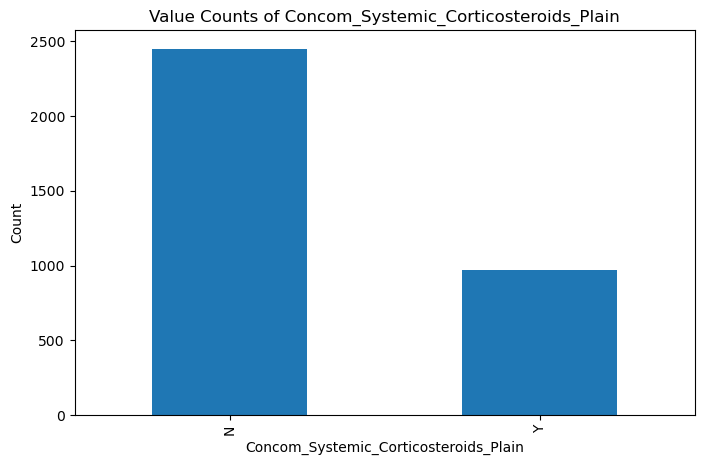

Concom_Anti_Depressants_And_Mood_Stabilisers value counts:
Concom_Anti_Depressants_And_Mood_Stabilisers
N    2465
Y     959
Name: count, dtype: int64



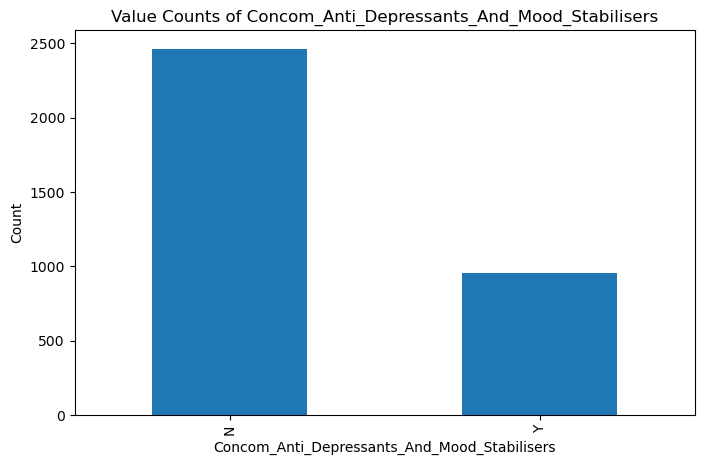

Concom_Fluoroquinolones value counts:
Concom_Fluoroquinolones
N    2787
Y     637
Name: count, dtype: int64



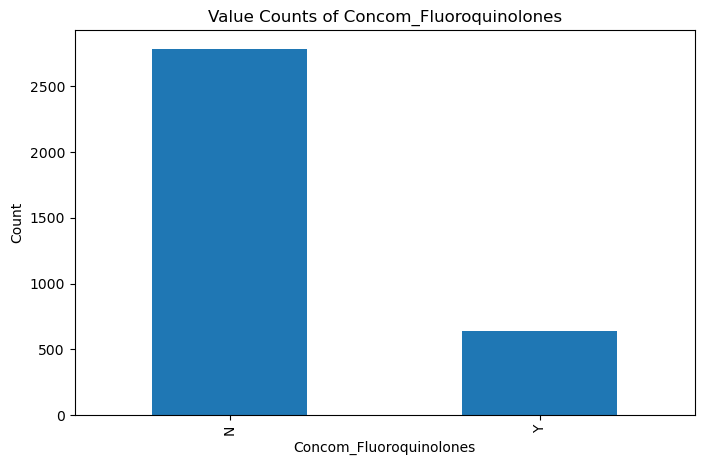

Concom_Cephalosporins value counts:
Concom_Cephalosporins
N    2821
Y     603
Name: count, dtype: int64



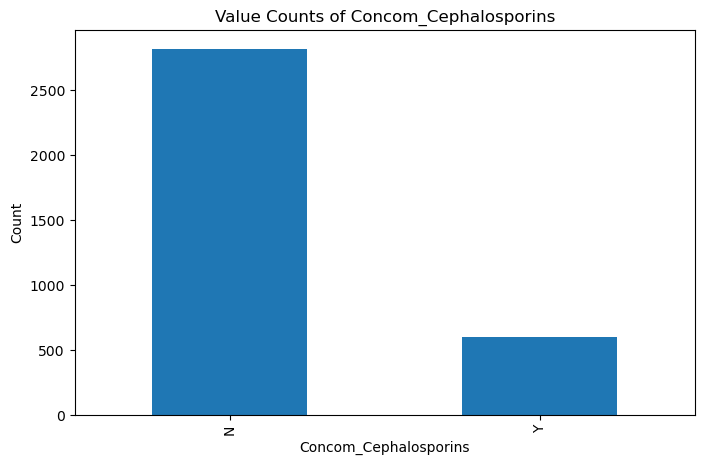

Concom_Macrolides_And_Similar_Types value counts:
Concom_Macrolides_And_Similar_Types
N    2853
Y     571
Name: count, dtype: int64



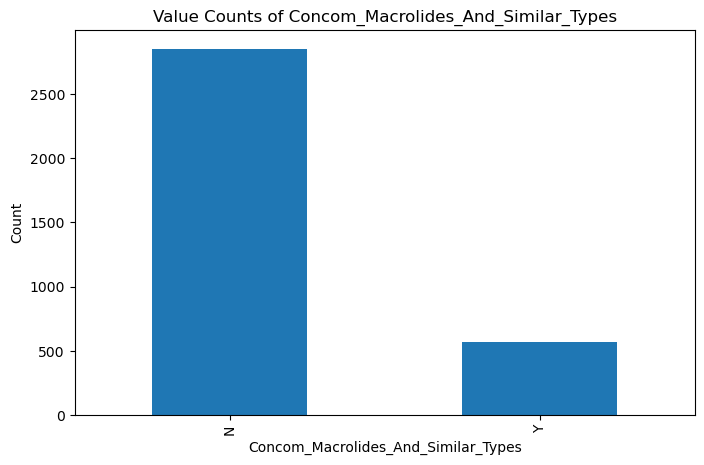

Concom_Broad_Spectrum_Penicillins value counts:
Concom_Broad_Spectrum_Penicillins
N    2985
Y     439
Name: count, dtype: int64



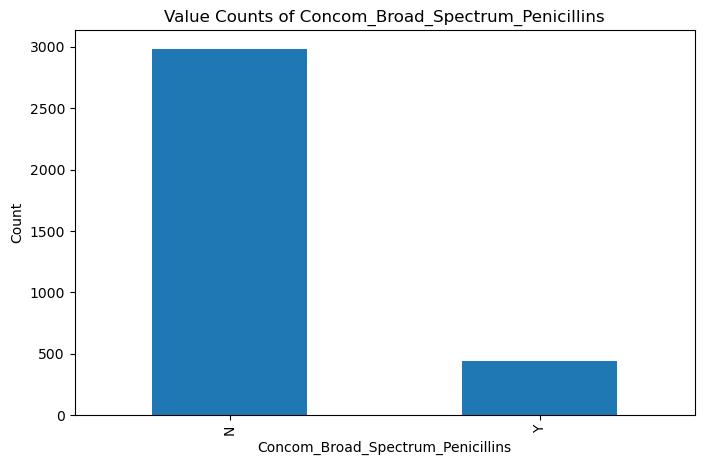

Concom_Anaesthetics_General value counts:
Concom_Anaesthetics_General
N    2927
Y     497
Name: count, dtype: int64



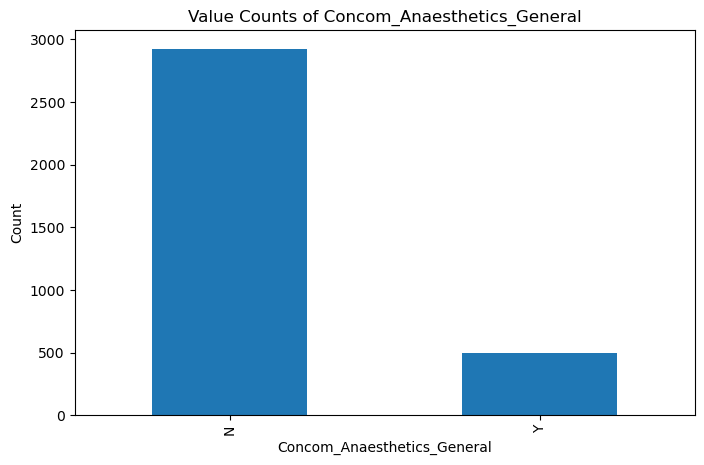

Concom_Viral_Vaccines value counts:
Concom_Viral_Vaccines
N    3071
Y     353
Name: count, dtype: int64



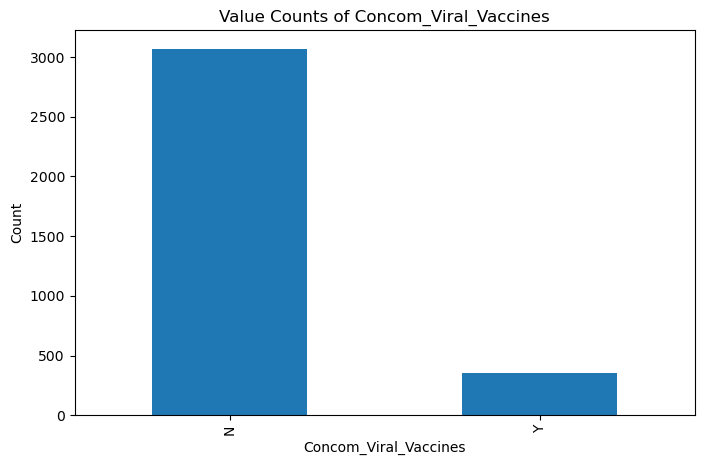

Risk_Type_1_Insulin_Dependent_Diabetes value counts:
Risk_Type_1_Insulin_Dependent_Diabetes
N    3285
Y     139
Name: count, dtype: int64



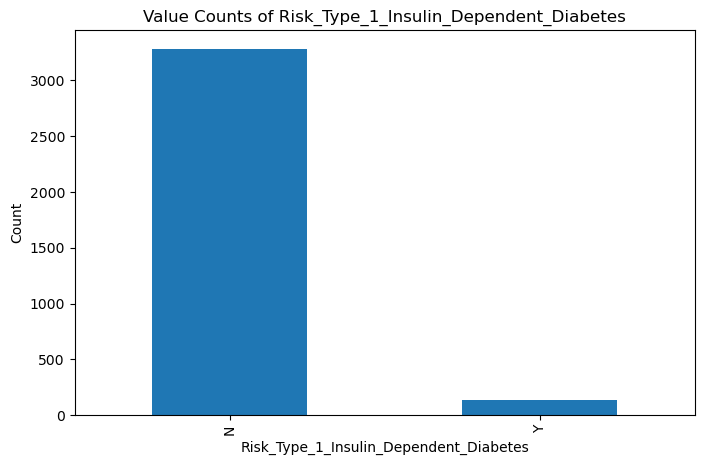

Risk_Osteogenesis_Imperfecta value counts:
Risk_Osteogenesis_Imperfecta
N    3421
Y       3
Name: count, dtype: int64



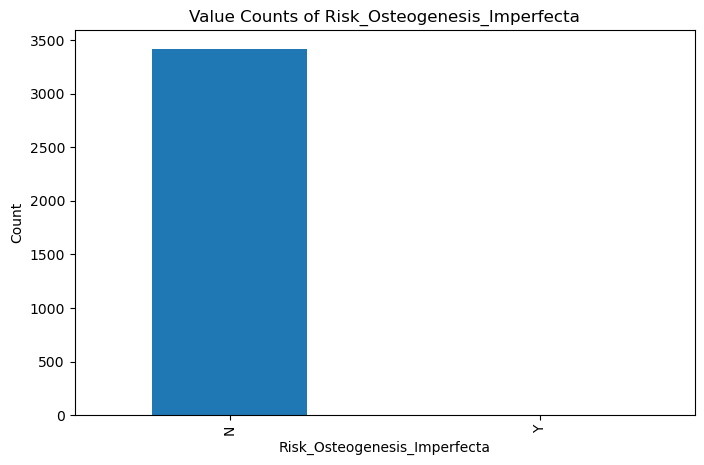

Risk_Rheumatoid_Arthritis value counts:
Risk_Rheumatoid_Arthritis
N    3294
Y     130
Name: count, dtype: int64



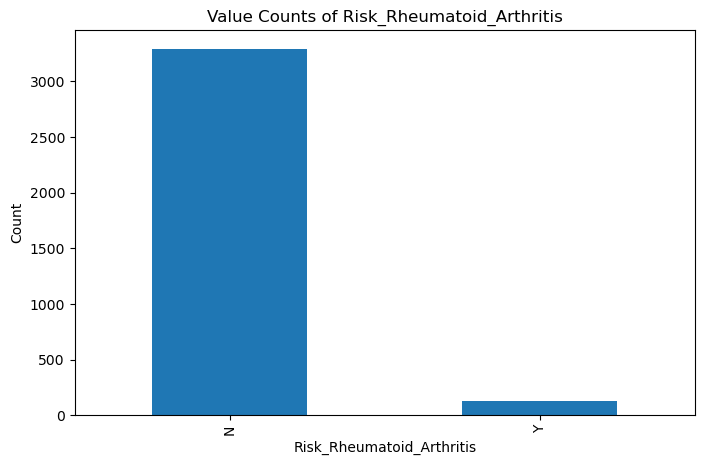

Risk_Untreated_Chronic_Hyperthyroidism value counts:
Risk_Untreated_Chronic_Hyperthyroidism
N    3422
Y       2
Name: count, dtype: int64



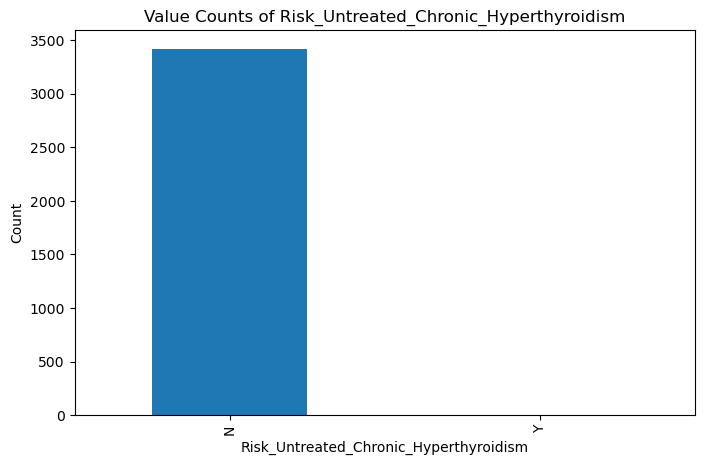

Risk_Untreated_Chronic_Hypogonadism value counts:
Risk_Untreated_Chronic_Hypogonadism
N    3297
Y     127
Name: count, dtype: int64



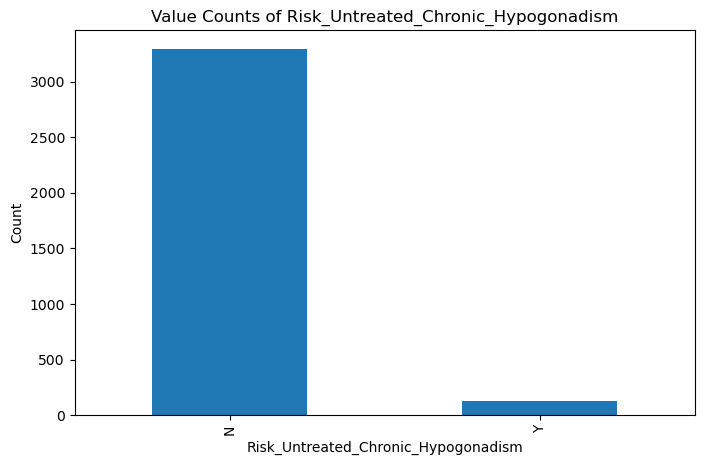

Risk_Untreated_Early_Menopause value counts:
Risk_Untreated_Early_Menopause
N    3412
Y      12
Name: count, dtype: int64



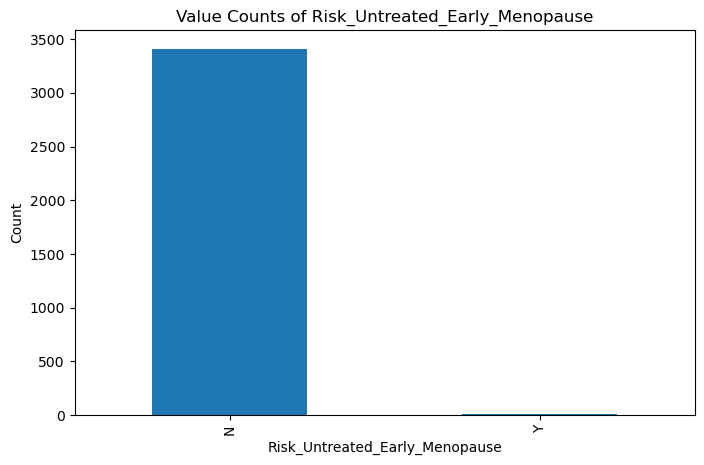

Risk_Patient_Parent_Fractured_Their_Hip value counts:
Risk_Patient_Parent_Fractured_Their_Hip
N    3168
Y     256
Name: count, dtype: int64



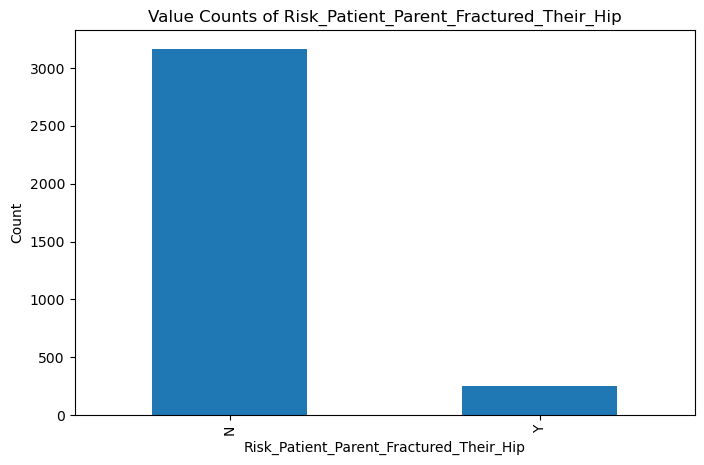

Risk_Smoking_Tobacco value counts:
Risk_Smoking_Tobacco
N    2780
Y     644
Name: count, dtype: int64



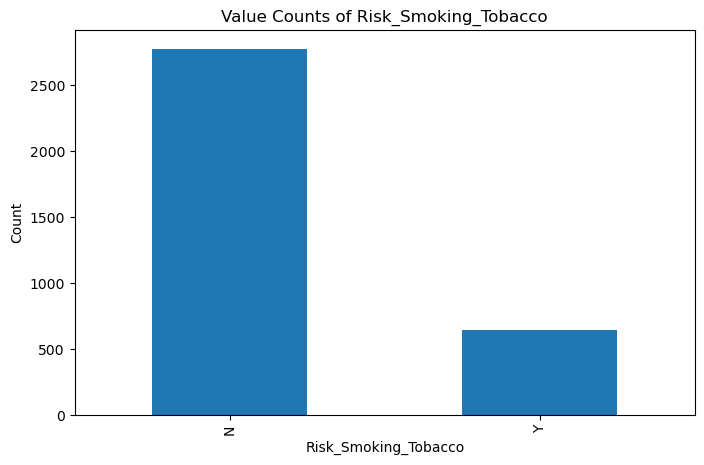

Risk_Chronic_Malnutrition_Or_Malabsorption value counts:
Risk_Chronic_Malnutrition_Or_Malabsorption
N    2954
Y     470
Name: count, dtype: int64



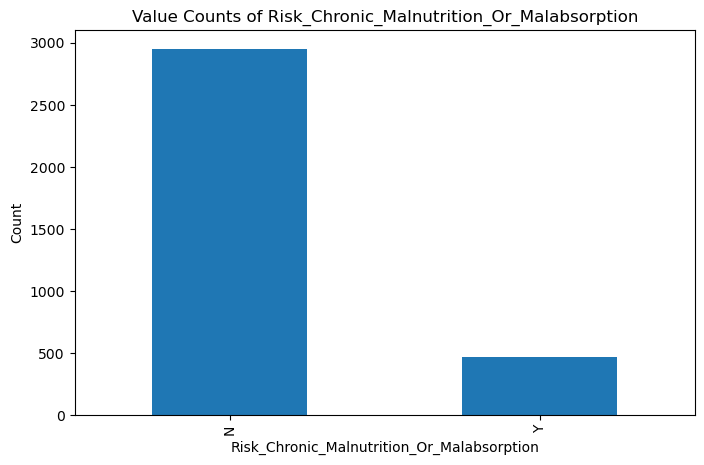

Risk_Chronic_Liver_Disease value counts:
Risk_Chronic_Liver_Disease
N    3406
Y      18
Name: count, dtype: int64



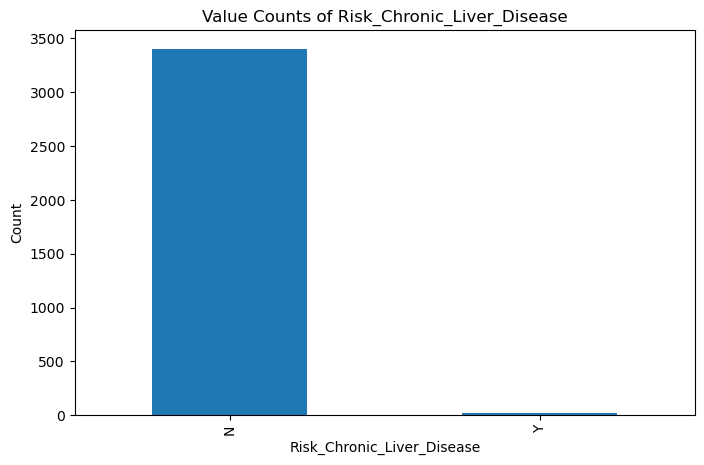

Risk_Family_History_Of_Osteoporosis value counts:
Risk_Family_History_Of_Osteoporosis
N    3066
Y     358
Name: count, dtype: int64



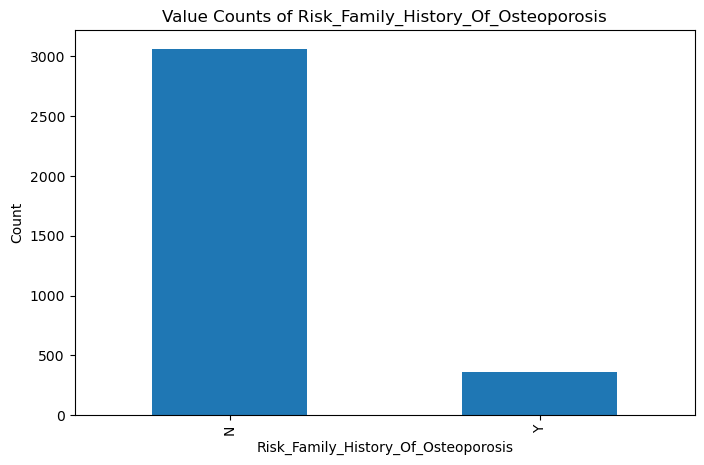

Risk_Low_Calcium_Intake value counts:
Risk_Low_Calcium_Intake
N    3382
Y      42
Name: count, dtype: int64



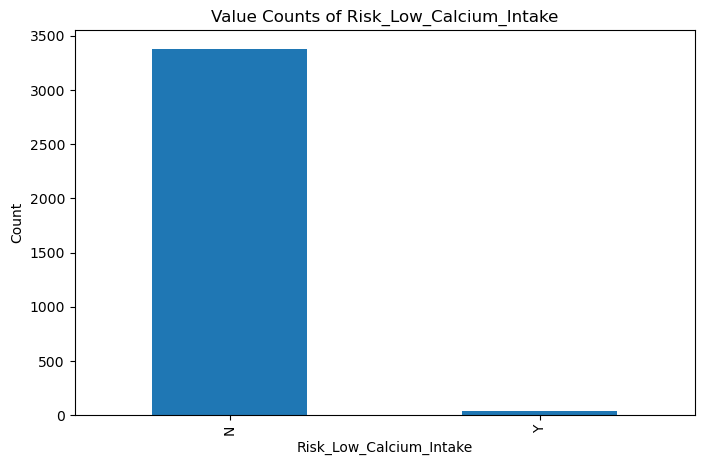

Risk_Vitamin_D_Insufficiency value counts:
Risk_Vitamin_D_Insufficiency
N    1788
Y    1636
Name: count, dtype: int64



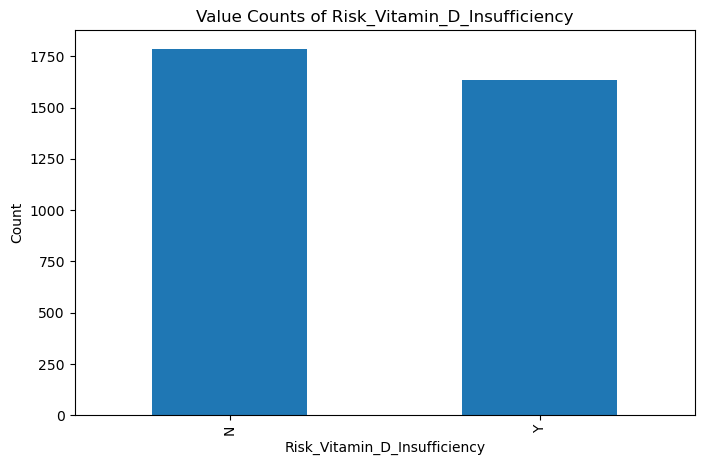

Risk_Poor_Health_Frailty value counts:
Risk_Poor_Health_Frailty
N    3232
Y     192
Name: count, dtype: int64



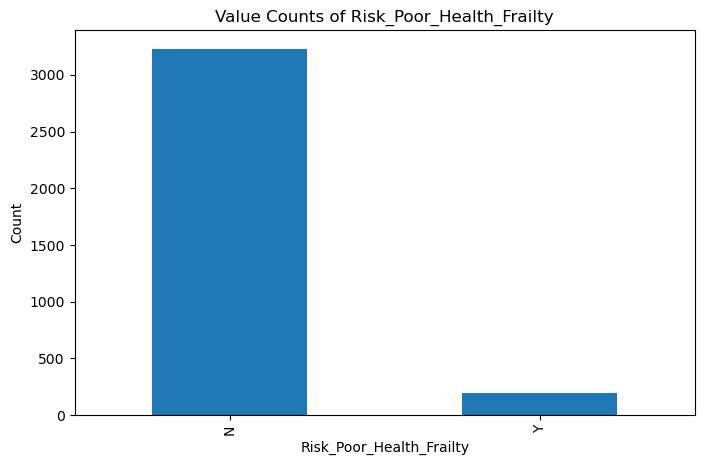

Risk_Excessive_Thinness value counts:
Risk_Excessive_Thinness
N    3357
Y      67
Name: count, dtype: int64



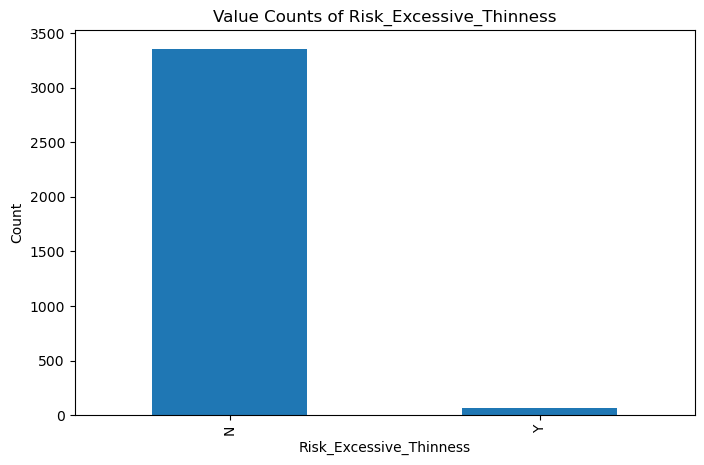

Risk_Hysterectomy_Oophorectomy value counts:
Risk_Hysterectomy_Oophorectomy
N    3370
Y      54
Name: count, dtype: int64



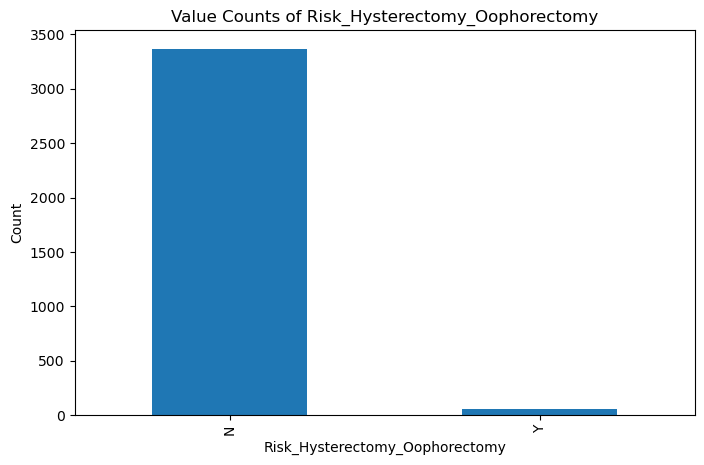

Risk_Estrogen_Deficiency value counts:
Risk_Estrogen_Deficiency
N    3413
Y      11
Name: count, dtype: int64



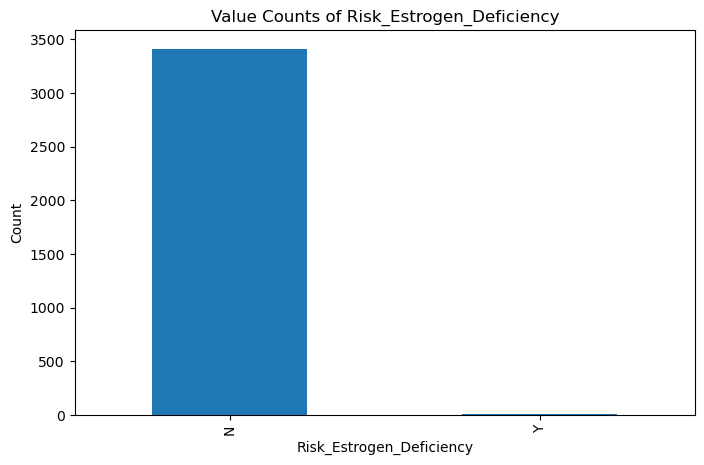

Risk_Immobilization value counts:
Risk_Immobilization
N    3410
Y      14
Name: count, dtype: int64



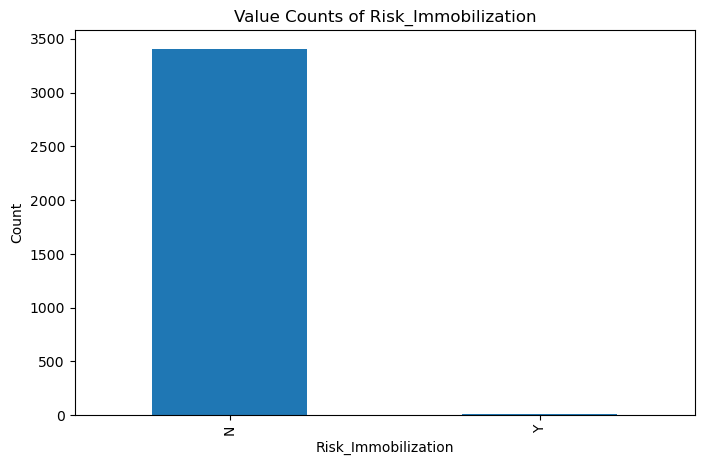

Risk_Recurring_Falls value counts:
Risk_Recurring_Falls
N    3355
Y      69
Name: count, dtype: int64



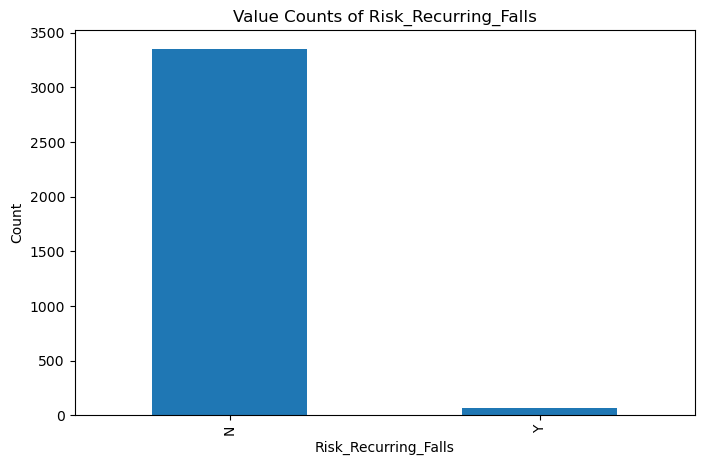

In [192]:
for i in object_value:
    value_counts = df[i].value_counts()
    print(f"{i} value counts:\n{value_counts}\n")
    value_counts.plot(kind='bar', figsize=(8, 5), title=f"Value Counts of {i}")
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

# 2-Cleaning Unknown Values(object)

In [193]:
#There are so many unknown values in the columns of Change_Risk_Segment, Change_T_Score, Tscore_Bucket_During_Rx and Risk_Segment_During_Rx. So I will eliminate these unknown values.

In [194]:
df.replace(['Other/Unknown', 'Unknown'], np.nan, inplace=True) # Firstly, I converted Other/Unknown and Unknown values to NaN and then dropped the NaN values.

In [195]:
df.dropna(subset=['Risk_Segment_During_Rx', 'Change_T_Score', 'Tscore_Bucket_During_Rx', 'Change_Risk_Segment'], inplace=True)

# 3-Detecting Outliers

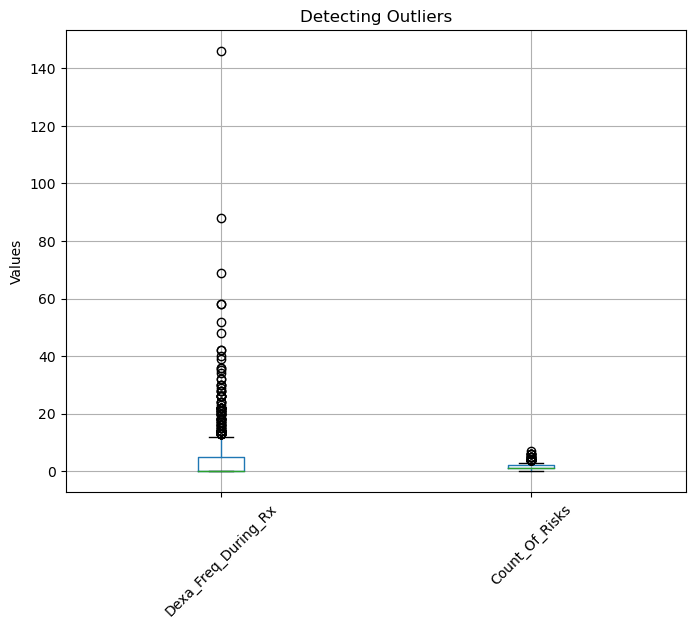

In [196]:
numerical_columns = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']

df[numerical_columns].boxplot(figsize=(8, 6))
plt.title("Detecting Outliers")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


In [197]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75) 
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for column in numerical_columns:
    outliers, lower, upper = find_outliers_iqr(df, column)
    print(f"Outliers in {column}:\n{outliers}\n")
    print(f"Lower bound: {lower}, Upper bound: {upper}\n")


Outliers in Dexa_Freq_During_Rx:
       Ptid Persistency_Flag  Gender       Race     Ethnicity   Region  \
116    P117   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
180    P181       Persistent  Female  Caucasian  Not Hispanic  Midwest   
186    P187       Persistent  Female  Caucasian  Not Hispanic    South   
198    P199       Persistent  Female  Caucasian  Not Hispanic    South   
201    P202       Persistent  Female  Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...        ...           ...      ...   
3048  P3049   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
3066  P3067       Persistent  Female  Caucasian  Not Hispanic    South   
3100  P3101       Persistent  Female  Caucasian  Not Hispanic  Midwest   
3236  P3237       Persistent  Female  Caucasian  Not Hispanic    South   
3382  P3383       Persistent  Female  Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
116       55-65  

In [198]:
Q1 = df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df['Dexa_Freq_During_Rx'] = df['Dexa_Freq_During_Rx'].clip(upper=upper_bound)

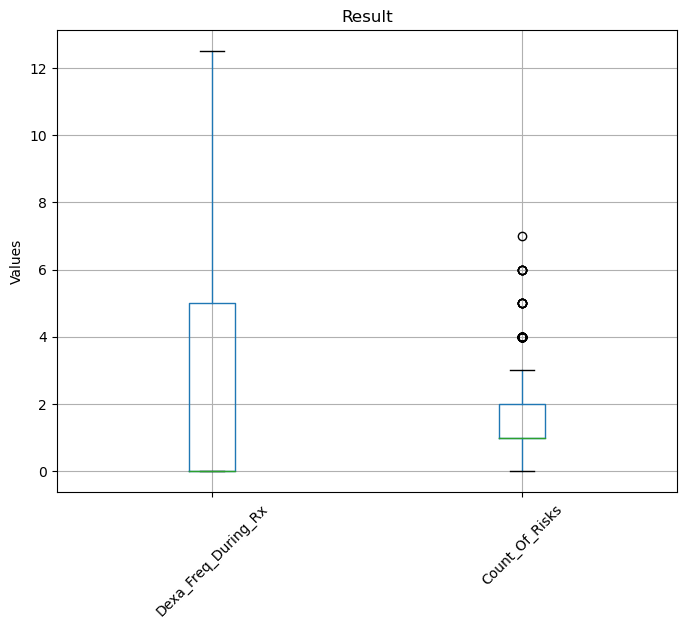

In [199]:
df[numerical_columns].boxplot(figsize=(8, 6))
plt.title("Result")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [200]:
df.to_excel('cleaned_dataset.xlsx', index=False)

In [201]:
column_list = ['Race', 'Gender', 'Ethnicity','Region', 'Age_Bucket', 'Ntm_Speciality', 'Adherent_Flag', 'Count_Of_Risks', 'Change_Risk_Segment']

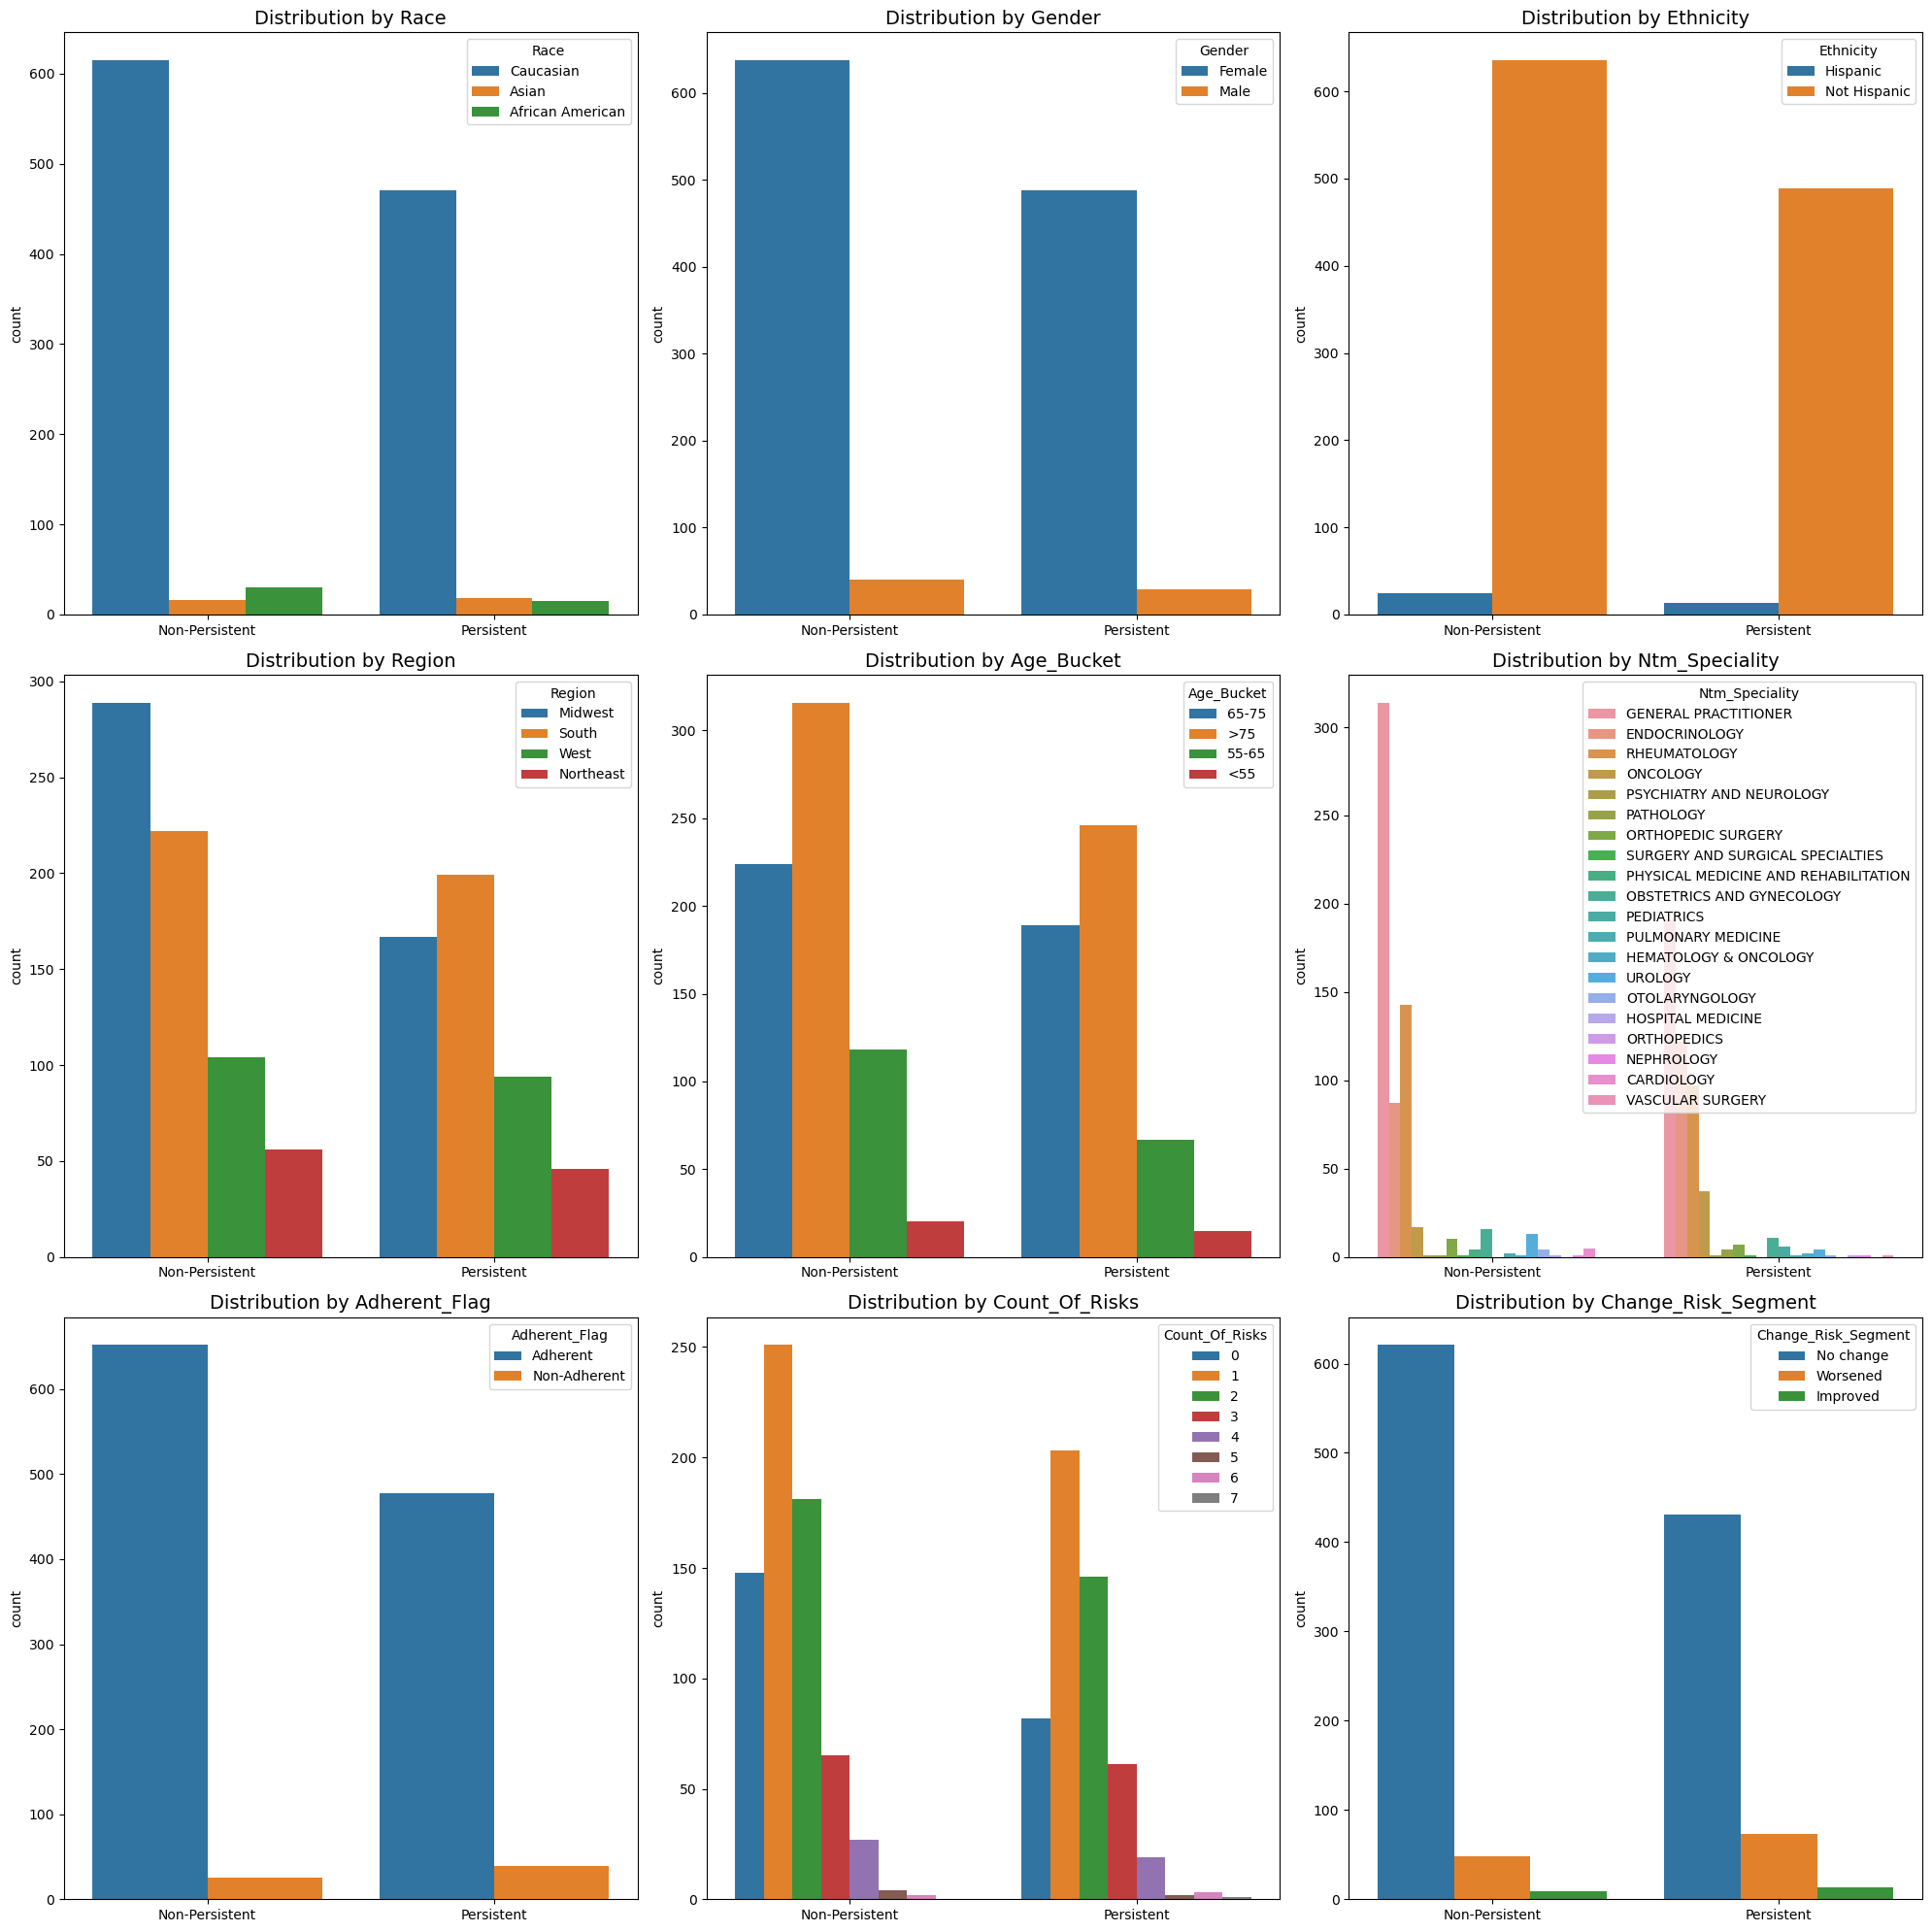

In [202]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(column_list):
    sns.countplot(data=df, x='Persistency_Flag', hue=column, ax=axes[i])
    axes[i].set_title(f'Distribution by {column}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(False)

plt.tight_layout()
plt.show()

# Week 12: Model Selection and Model Building

In [203]:
from sklearn.model_selection import train_test_split

X = df.drop('Persistency_Flag', axis=1) 
y = df['Persistency_Flag']  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (717, 68)
Validation shape: (239, 68)
Test shape: (239, 68)


In [204]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Ptid', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket',
       'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other

# Encoding

In [205]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)

X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [206]:
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_val_encoded shape:", X_val_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)

print(X_train_encoded.dtypes)

X_train_encoded shape: (717, 872)
X_val_encoded shape: (239, 872)
X_test_encoded shape: (239, 872)
Dexa_Freq_During_Rx           float64
Count_Of_Risks                  int64
Ptid_P1000                       bool
Ptid_P1001                       bool
Ptid_P1006                       bool
                               ...   
Risk_Estrogen_Deficiency_Y       bool
Risk_Immobilization_N            bool
Risk_Immobilization_Y            bool
Risk_Recurring_Falls_N           bool
Risk_Recurring_Falls_Y           bool
Length: 872, dtype: object


In [207]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

print("Classes:", label_encoder.classes_) 

Classes: ['Non-Persistent' 'Persistent']


In [208]:
X_train_encoded.columns = X_train_encoded.columns.astype(str)
X_val_encoded.columns = X_val_encoded.columns.astype(str)
X_test_encoded.columns = X_test_encoded.columns.astype(str)

In [209]:
X_train_encoded.columns = X_train_encoded.columns.str.replace(r'[\[\]<>,]', '_', regex=True)
X_val_encoded.columns = X_val_encoded.columns.str.replace(r'[\[\]<>,]', '_', regex=True)
X_test_encoded.columns = X_test_encoded.columns.str.replace(r'[\[\]<>,]', '_', regex=True)

# Model Training and Prediction

In [210]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_encoded, y_train_encoded)

y_val_pred_log = log_model.predict(X_val_encoded)
y_val_prob_log = log_model.predict_proba(X_val_encoded)[:, 1]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train_encoded)

y_val_pred_rf = rf_model.predict(X_val_encoded)
y_val_prob_rf = rf_model.predict_proba(X_val_encoded)[:, 1]

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_encoded, y_train_encoded)

y_val_pred_xgb = xgb_model.predict(X_val_encoded)
y_val_prob_xgb = xgb_model.predict_proba(X_val_encoded)[:, 1]

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Evaluation Metrics

In [211]:
print("Logistic Regression Classification Report:")
print(classification_report(y_val_encoded, y_val_pred_log, target_names=label_encoder.classes_))
print("ROC-AUC Score:", roc_auc_score(y_val_encoded, y_val_prob_log))

print("Random Forest Classification Report:")
print(classification_report(y_val_encoded, y_val_pred_rf, target_names=label_encoder.classes_))
print("ROC-AUC Score:", roc_auc_score(y_val_encoded, y_val_prob_rf))

print("XGBoost Classification Report:")
print(classification_report(y_val_encoded, y_val_pred_xgb, target_names=label_encoder.classes_))
print("ROC-AUC Score:", roc_auc_score(y_val_encoded, y_val_prob_xgb))

Logistic Regression Classification Report:
                precision    recall  f1-score   support

Non-Persistent       0.80      0.84      0.82       135
    Persistent       0.78      0.72      0.75       104

      accuracy                           0.79       239
     macro avg       0.79      0.78      0.79       239
  weighted avg       0.79      0.79      0.79       239

ROC-AUC Score: 0.8696581196581196
Random Forest Classification Report:
                precision    recall  f1-score   support

Non-Persistent       0.79      0.87      0.83       135
    Persistent       0.81      0.69      0.75       104

      accuracy                           0.79       239
     macro avg       0.80      0.78      0.79       239
  weighted avg       0.80      0.79      0.79       239

ROC-AUC Score: 0.8672364672364673
XGBoost Classification Report:
                precision    recall  f1-score   support

Non-Persistent       0.77      0.83      0.80       135
    Persistent       0.76     

# Visualization

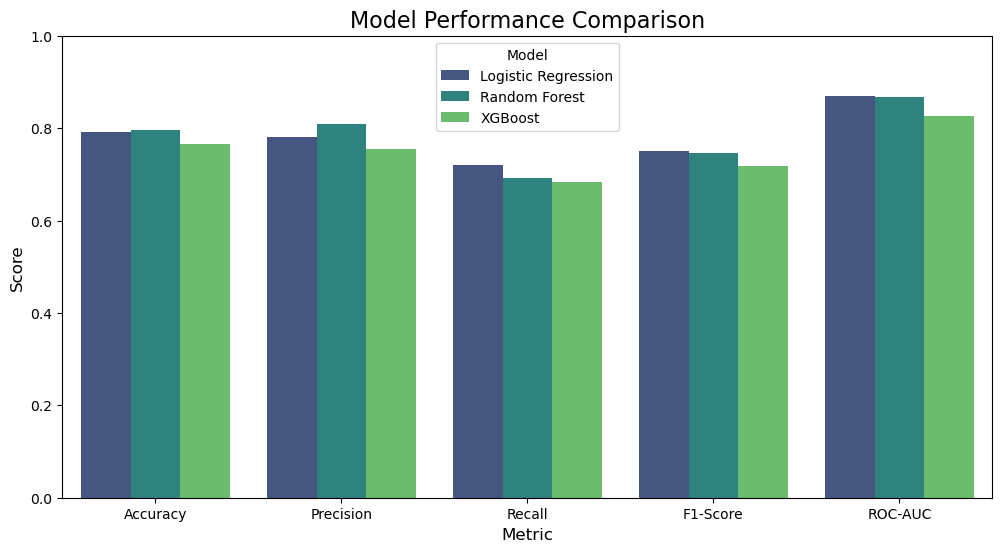

In [212]:
metrics = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_val_encoded, y_val_pred_log),
        accuracy_score(y_val_encoded, y_val_pred_rf),
        accuracy_score(y_val_encoded, y_val_pred_xgb)
    ],
    "Precision": [
        precision_score(y_val_encoded, y_val_pred_log),
        precision_score(y_val_encoded, y_val_pred_rf),
        precision_score(y_val_encoded, y_val_pred_xgb)
    ],
    "Recall": [
        recall_score(y_val_encoded, y_val_pred_log),
        recall_score(y_val_encoded, y_val_pred_rf),
        recall_score(y_val_encoded, y_val_pred_xgb)
    ],
    "F1-Score": [
        f1_score(y_val_encoded, y_val_pred_log),
        f1_score(y_val_encoded, y_val_pred_rf),
        f1_score(y_val_encoded, y_val_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_val_encoded, y_val_prob_log),
        roc_auc_score(y_val_encoded, y_val_prob_rf),
        roc_auc_score(y_val_encoded, y_val_prob_xgb)
    ]
}

metrics_df = pd.DataFrame(metrics)

metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend(title="Model")
plt.ylim(0, 1)
plt.show()

# Cross-validation

In [213]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [214]:
from sklearn.model_selection import cross_val_score

xgb_cv_scores = cross_val_score(xgb_model, X_train_encoded, y_train_encoded, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy:", xgb_cv_scores.mean())

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

XGBoost Cross-Validation Accuracy: 0.7587995337995339


In [215]:
log_cv_scores = cross_val_score(log_model, X_train_encoded, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", log_cv_scores.mean())

Logistic Regression Cross-Validation Accuracy: 0.7810994560994561


In [216]:
rf_cv_scores = cross_val_score(rf_model, X_train_encoded, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Accuracy: 0.7726689976689977


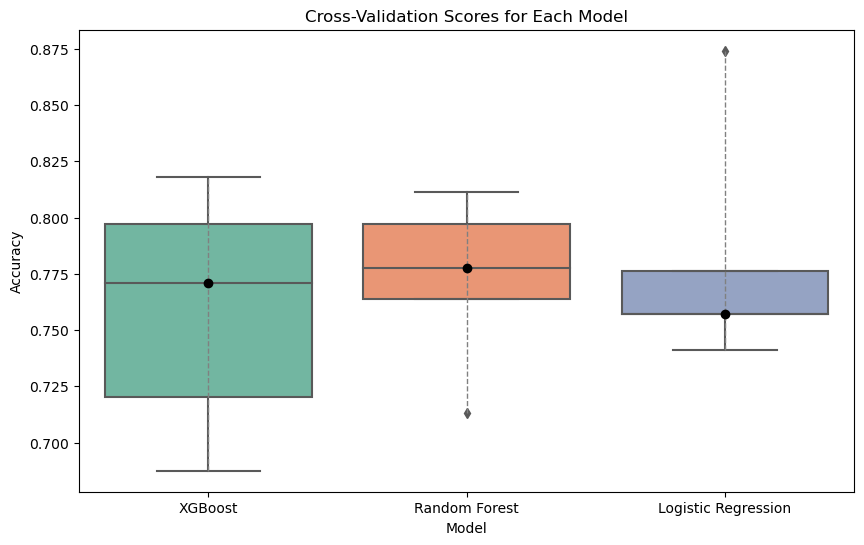

In [217]:
cv_results = {
    'XGBoost': xgb_cv_scores,
    'Random Forest': rf_cv_scores,
    'Logistic Regression': log_cv_scores
}

cv_df = pd.DataFrame(cv_results)

plt.figure(figsize=(10, 6))

sns.boxplot(data=cv_df, palette="Set2")

for i in range(len(cv_df.columns)):
    plt.plot([i, i], [cv_df.iloc[:, i].min(), cv_df.iloc[:, i].max()], color='gray', linestyle='--', lw=1)  
    plt.scatter(i, cv_df.iloc[:, i].median(), color='black', zorder=3)  

plt.title('Cross-Validation Scores for Each Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')

plt.show()

# Stacking

In [218]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)

print("Stacking Model Classification Report:")
print(classification_report(y_test, y_pred_stack))

Stacking Model Classification Report:
                precision    recall  f1-score   support

Non-Persistent       0.75      0.92      0.83        79
    Persistent       0.87      0.63      0.73        65

      accuracy                           0.79       144
     macro avg       0.81      0.78      0.78       144
  weighted avg       0.81      0.79      0.79       144

